## Exploração dos dados do Datasus desde 2008 <br>
- Datasus: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/ <br>
- Link direto: http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi <br>
- 2 arquivos gerados
   
   Opções selecionadas:
   
        - Dados Consolidados AIH (RD), por local de internação, a partir de 2008
        - Brasil por Região e Unidaded da Federação
            - Linha: Região / Unidade da Federação

            - Coluna: Ano / mês processamento
            ou
            - Coluna: Ano / mês atendimento

            - Conteúdo: Valor total
            = Períodos disponíveis: Todos os meses selecionados


## Módulo 01

Declaração de funções

In [256]:
#a função receberá duas tabelas, no nosso caso "gastos_mes_mais_recente_desafio04" e "dados_da_populacao_desafio04"
def limpeza_tabelas(dados_da_populacao_funcao, gastos_mes_mais_recente_funcao):
    #Mudar o nome da coluna "Unidade federativa" para "DF"
    #Mudar o nome da coluna "População" para "Populacao"
    dados_da_populacao_funcao = dados_da_populacao_funcao.rename(columns={"Unidade federativa": "UF", "População": "Populacao"})
    dados_da_populacao_funcao
    #remover a primeira linha com os valores NaN
    #dados_da_populacao_funcao = dados_da_populacao_funcao[1:]
    #remover espaço
    dados_da_populacao_funcao["Populacao"] = dados_da_populacao_funcao["Populacao"].str.replace(" ","")
    #transformar em int
    dados_da_populacao_funcao["Populacao"] = pd.to_numeric(dados_da_populacao_funcao["Populacao"])
    #Deixar apenas as colunas UF e Populacao no dataframe
    dados_da_populacao_funcao = dados_da_populacao_funcao[["UF", "Populacao"]]
    #transformar a coluna UF em índice
    dados_da_populacao_funcao = dados_da_populacao_funcao.set_index("UF")
    #retirar o número antes do nome do estado em "gastos_mes_mais_recente"
    gastos_mes_mais_recente_funcao.index = gastos_mes_mais_recente_funcao.index.str[3:]
    #retirar os espaços do índice de "dados_da_populacao"
    dados_da_populacao_funcao.index = dados_da_populacao_funcao.index.str.strip()
    #há estados que estão com nomes repetidos em "dados_da_populacao" (Bahia e Pará), precisamos tratar
    for estado in gastos_mes_mais_recente_funcao.index:
        dados_da_populacao_funcao.index = dados_da_populacao_funcao.index.str.replace(f"{estado} {estado}", estado)
    #agora podemos fazer o join
    #print(dados_da_populacao_funcao.index)
    return dados_da_populacao_funcao.join(gastos_mes_mais_recente_funcao)

In [257]:
#gerar as colunas "gastos" e "gastos por habitante"
def gastos_e_gasto_por_habitante(dados, mes: str):
    dados[f"gastos {mes}"] = dados[mes] * 1000000
    dados[f"gasto por habitante {mes}"] = dados[f"gastos {mes}"]/ dados["Populacao"]
    return(dados)

### Aula 01

In [258]:
#Ler o arquivo
import pandas as pd 

#ignora as 3 primeiras e as 12 últimas linhas

#ano/mês processamento
#dados = pd.read_csv("https://github.com/cmattosr/bootcampDS_Mod02/raw/main/dados/A172236189_28_143_208.csv", sep=";", encoding="ISO-8859-1", skiprows=3, 
#                    skipfooter=12, decimal=",", thousands=".")

#ano/mês atendimento
dados = pd.read_csv("https://github.com/cmattosr/bootcampDS_Mod02/raw/main/dados/A213413189_28_143_208.csv", sep=";", encoding="ISO-8859-1", skiprows=3, 
                    skipfooter=12, decimal=",", thousands=".")
                    
display(dados)

<ipython-input-258-41c00a94c21c>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv("https://github.com/cmattosr/bootcampDS_Mod02/raw/main/dados/A213413189_28_143_208.csv", sep=";", encoding="ISO-8859-1", skiprows=3,


Unidade da Federação  1992/Mar  1992/Abr  1993/Mai  1993/Dez  1994/Jan  \
0              11 Rondônia         -         -         -         -         -   
1                  12 Acre         -         -         -         -         -   
2              13 Amazonas         -         -         -         -         -   
3               14 Roraima         -         -         -         -         -   
4                  15 Pará         -         -         -         -         -   
5                 16 Amapá         -         -         -         -         -   
6             17 Tocantins         -         -         -         -         -   
7              21 Maranhão         -         -         -         -         -   
8                 22 Piauí         -         -         -         -         -   
9                 23 Ceará         -         -         -         -         -   
10  24 Rio Grande do Norte         -         -         -         -         -   
11              25 Paraíba         -         -         -         -         -   
12           26 Pernambuco         -         -         -         -         -   
13              27 Alagoas         -         -         -         -         -   
14              28 Sergipe         -         -         -         -         -   
15                29 Bahia         -         -         -         -         -   
16         31 Minas Gerais         -         -         -         -         -   
17       32 Espírito Santo         -         -         -         -         -   
18       33 Rio de Janeiro         -         -         -         -         -   
19            35 São Paulo  40243.16  11449.99  34583.77  68556.52  39809.34   
20               41 Paraná         -         -         -         -         -   
21       42 Santa Catarina         -         -         -         -         -   
22    43 Rio Grande do Sul         -         -         -         -         -   
23   50 Mato Grosso do Sul         -         -         -         -         -   
24          51 Mato Grosso         -         -         -         -         -   
25                52 Goiás         -         -         -         -         -   
26     53 Distrito Federal         -         -         -         -         -   

    1994/Fev  1994/Mai  1994/Ago  1994/Nov  ...       2020/Jul       2020/Ago  \
0          -         -         -         -  ...  10,479,989.36  11,433,467.56   
1          -         -         -         -  ...   4,053,085.41   3,658,265.59   
2          -         -         -         -  ...  19,303,743.16  18,687,233.58   
3          -         -         -         -  ...   3,192,075.41   3,262,354.34   
4          -         -         -         -  ...  40,496,349.97  38,793,393.54   
5          -         -         -         -  ...   2,536,642.73   2,702,550.32   
6          -         -         -         -  ...   7,934,629.02   6,488,927.84   
7          -         -         -         -  ...  33,991,348.70  32,711,259.43   
8          -         -         -         -  ...  25,817,440.95  22,452,255.50   
9          -         -         -         -  ...  58,448,488.85  55,118,185.83   
10         -         -         -         -  ...  28,608,103.39  25,721,339.11   
11         -         -         -         -  ...  22,092,553.67  19,346,119.89   
12         -         -         -         -  ...  73,730,927.63  76,091,056.19   
13         -         -         -         -  ...  18,519,350.73  16,706,034.11   
14         -         -         -         -  ...  11,700,344.16  12,434,101.29   
15         -         -         -         -  ...  91,011,171.04  86,230,665.84   
16         -         -         -         -  ... 177,466,638.10 182,176,122.99   
17         -         -         -         -  ...  41,931,102.65  36,405,257.36   
18         -         -         -         -  ...  95,941,141.03  89,795,469.41   
19  19904.67  19904.67  34532.40  23374.12  ... 361,986,896.25 350,268,671.25   
20         -         -         -         -  ... 123,856,640.55 1

In [259]:
#Visualizar as últimas 5 linhas do arquivo
dados.tail()

Unidade da Federação 1992/Mar 1992/Abr 1993/Mai 1993/Dez 1994/Jan  \
22   43 Rio Grande do Sul        -        -        -        -        -   
23  50 Mato Grosso do Sul        -        -        -        -        -   
24         51 Mato Grosso        -        -        -        -        -   
25               52 Goiás        -        -        -        -        -   
26    53 Distrito Federal        -        -        -        -        -   

   1994/Fev 1994/Mai 1994/Ago 1994/Nov  ...       2020/Jul       2020/Ago  \
22        -        -        -        -  ... 108,536,525.93 111,762,290.19   
23        -        -        -        -  ...  23,639,938.85  22,608,351.55   
24        -        -        -        -  ...  20,681,571.71  20,936,140.39   
25        -        -        -        -  ...  45,871,329.20  47,568,155.41   
26        -        -        -        -  ...  26,428,483.82  23,875,303.68   

         2020/Set       2020/Out       2020/Nov       2020/Dez       2021/Jan  \
22 110,107,867.30 113,886,837.47 116,738,266.69 116,833,971.73 102,317,646.36   
23  21,519,151.07  21,825,003.22  21,418,665.16  21,387,005.58  16,027,788.65   
24  20,176,196.43  20,387,936.40  18,316,623.02  18,852,854.81  15,890,528.31   
25  47,951,326.80  45,304,843.74  39,785,408.90  37,614,253.55  35,655,886.73   
26  21,771,866.33  23,087,586.62  20,668,526.36  22,552,034.04  22,573,869.50   

        2021/Fev      2021/Mar             Total  
22 84,404,640.00 37,798,832.80 12,764,391,179.92  
23 11,428,462.42  4,035,989.77  2,324,525,096.33  
24 13,207,979.82  8,835,890.09  2,180,119,781.15  
25 32,253,788.65 24,867,001.02  4,973,572,261.43  
26 19,004,029.87 14,731,938.43  2,592,422,853.56  

[5 rows x 287 columns]

In [260]:
#formatar como o pandas deve mostrar os números float
pd.options.display.float_format = "{:,.2f}".format

In [261]:
#Visualizar as últimas 5 linhas do arquivo
dados.tail()

Unidade da Federação 1992/Mar 1992/Abr 1993/Mai 1993/Dez 1994/Jan  \
22   43 Rio Grande do Sul        -        -        -        -        -   
23  50 Mato Grosso do Sul        -        -        -        -        -   
24         51 Mato Grosso        -        -        -        -        -   
25               52 Goiás        -        -        -        -        -   
26    53 Distrito Federal        -        -        -        -        -   

   1994/Fev 1994/Mai 1994/Ago 1994/Nov  ...       2020/Jul       2020/Ago  \
22        -        -        -        -  ... 108,536,525.93 111,762,290.19   
23        -        -        -        -  ...  23,639,938.85  22,608,351.55   
24        -        -        -        -  ...  20,681,571.71  20,936,140.39   
25        -        -        -        -  ...  45,871,329.20  47,568,155.41   
26        -        -        -        -  ...  26,428,483.82  23,875,303.68   

         2020/Set       2020/Out       2020/Nov       2020/Dez       2021/Jan  \
22 110,107,867.30 113,886,837.47 116,738,266.69 116,833,971.73 102,317,646.36   
23  21,519,151.07  21,825,003.22  21,418,665.16  21,387,005.58  16,027,788.65   
24  20,176,196.43  20,387,936.40  18,316,623.02  18,852,854.81  15,890,528.31   
25  47,951,326.80  45,304,843.74  39,785,408.90  37,614,253.55  35,655,886.73   
26  21,771,866.33  23,087,586.62  20,668,526.36  22,552,034.04  22,573,869.50   

        2021/Fev      2021/Mar             Total  
22 84,404,640.00 37,798,832.80 12,764,391,179.92  
23 11,428,462.42  4,035,989.77  2,324,525,096.33  
24 13,207,979.82  8,835,890.09  2,180,119,781.15  
25 32,253,788.65 24,867,001.02  4,973,572,261.43  
26 19,004,029.87 14,731,938.43  2,592,422,853.56  

[5 rows x 287 columns]

In [262]:
#Visualizar a média das colunas
dados.mean()

2007/Ago         304,952.77
2007/Set         788,145.26
2007/Out       2,440,162.96
2007/Nov       5,517,354.05
2007/Dez      12,337,159.42
                 ...       
2020/Dez      53,772,909.13
2021/Jan      49,474,107.60
2021/Fev      38,992,424.23
2021/Mar      24,163,712.88
Total      6,388,205,992.19
Length: 165, dtype: float64

In [263]:
#Visualizar apenas uma coluna, no caso a coluna 2008/Ago
dados["2008/Ago"]

0      2,938,286.29
1      1,886,871.84
2      8,331,763.97
3      1,045,291.11
4     23,259,148.28
5      1,550,340.63
6      5,213,290.38
7     14,609,872.57
8     10,645,917.52
9     29,304,821.51
10    10,812,840.19
11    12,673,774.35
12    31,705,296.79
13     9,262,767.68
14     4,543,252.50
15    43,254,543.33
16    80,374,117.08
17    12,384,068.19
18    42,500,830.29
19   180,005,050.15
20    56,699,001.13
21    28,887,854.62
22    56,233,758.74
23     9,602,843.49
24     8,987,811.95
25    21,054,991.27
26    11,548,451.89
Name: 2008/Ago, dtype: float64

In [264]:
#Visualizar a média de apenas uma coluna, no caso a coluna 2008/Ago
dados["2008/Ago"].mean()

26641365.101481482

<AxesSubplot:xlabel='Unidade da Federação'>

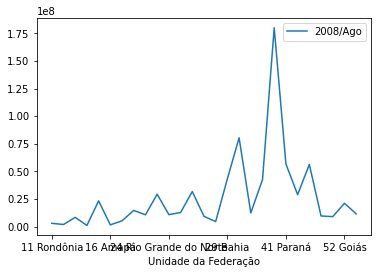

In [265]:
#Plotando uma coluna
dados.plot(x='Unidade da Federação', y='2008/Ago')

<AxesSubplot:xlabel='Unidade da Federação'>

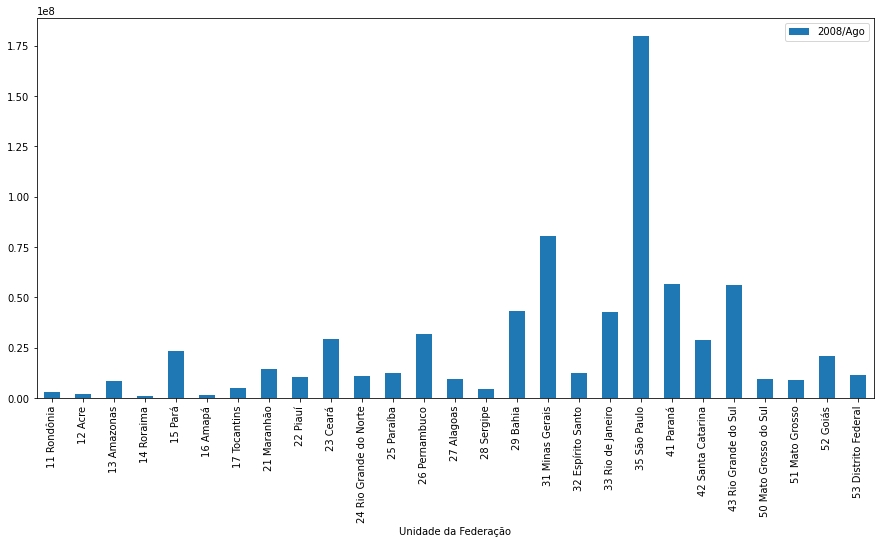

In [266]:
#Plotando uma coluna e melhorando o gráfico
dados.plot(x='Unidade da Federação', y='2008/Ago', kind="bar", figsize=(15, 7))

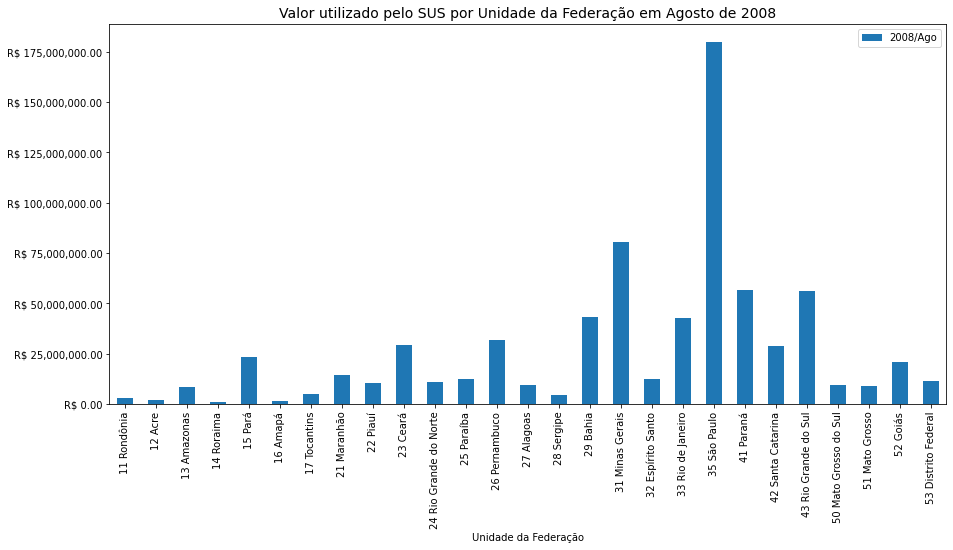

In [267]:
#Usando o matplotlib para plotar
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
#Título do gráfico
plt.title("Valor utilizado pelo SUS por Unidade da Federação em Agosto de 2008", size=14)
plt.show()

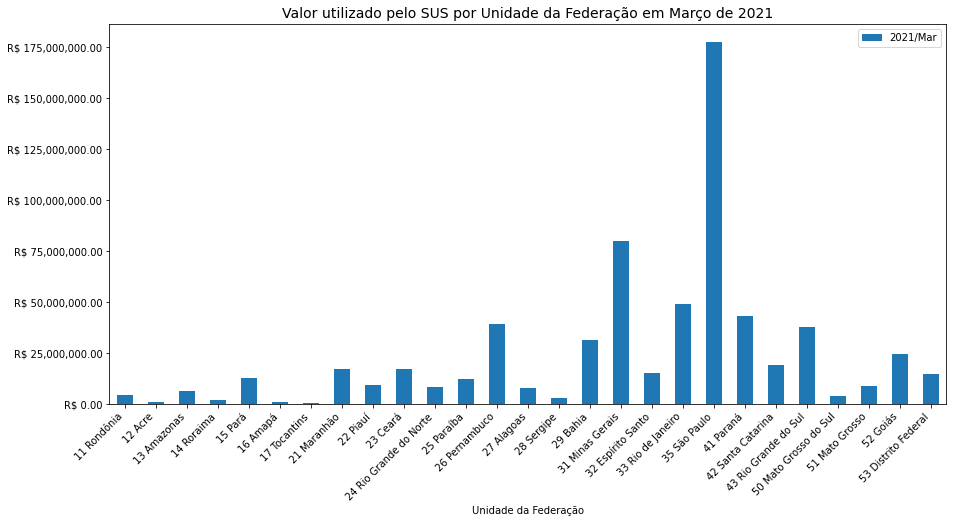

In [268]:
ax = dados.plot(x='Unidade da Federação', y='2021/Mar', kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
#Título do gráfico
plt.title("Valor utilizado pelo SUS por Unidade da Federação em Março de 2021", size=14)
#Colocando os labels do eixo x na diagonal
plt.xticks(rotation=45, ha="right")
plt.show()

In [269]:
#Criando uma coluna com os ids dos estados, para que sejam removidos da coluna Unidade da Federação
#dados["id_UF"] = dados["Unidade da Federação"].str.slice(0,3)
#dados["id_UF"]

In [270]:
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=287)

In [271]:
#Retirando os ids da coluna Unidade da Federação
#dados["Unidade da Federação"] = dados["Unidade da Federação"].str.slice(3,)
#dados["Unidade da Federação"]

### Aula 02

In [272]:
#Verificar quantidade de linhas e colunas
dados.shape

(27, 287)

In [273]:
#Verificar dois meses
dados[["2008/Ago", "2008/Set"]].head()

2008/Ago      2008/Set
0  2,938,286.29  2,843,930.91
1  1,886,871.84  2,084,884.80
2  8,331,763.97  8,148,089.92
3  1,045,291.11  1,003,740.89
4 23,259,148.28 23,667,690.01

In [274]:
dados.mean()
#o mean() traz apenas as colunas com valores, nosso dataframe tem várias colunas vazias

2007/Ago         304,952.77
2007/Set         788,145.26
2007/Out       2,440,162.96
2007/Nov       5,517,354.05
2007/Dez      12,337,159.42
                 ...       
2020/Dez      53,772,909.13
2021/Jan      49,474,107.60
2021/Fev      38,992,424.23
2021/Mar      24,163,712.88
Total      6,388,205,992.19
Length: 165, dtype: float64

In [275]:
#Filtrando pelas colunas que têm valores através do mean() ele não considera a coluna Unidade da Federação
#Para manter essa coluna temos que manualmente inseri-la
#o index é imutável, então primeiro precisamos transformá-lo numa lista
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [276]:
#Visualizando apenas as colunas com dados
usaveis = dados[colunas_usaveis]

In [277]:
#Colocando a coluna dos estados como índice
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

2007/Ago     2007/Set      2007/Out      2007/Nov  \
Unidade da Federação                                                           
11 Rondônia                4,209.37    16,397.03    133,645.19    346,912.84   
12 Acre                   10,470.07    14,001.71     86,200.85    301,323.68   
13 Amazonas               35,752.72    45,570.64    416,012.30  2,020,381.79   
14 Roraima                 4,785.91    11,858.63     43,852.67    369,328.51   
15 Pará                  181,159.29   433,414.74  1,893,197.50  5,105,406.44   
16 Amapá                  33,672.74   104,822.98    118,378.28    226,661.18   
17 Tocantins               4,113.76    76,633.06    343,702.61  1,068,685.94   
21 Maranhão              385,330.18 1,018,352.93  2,277,717.78  4,334,468.23   
22 Piauí                 220,788.25   353,468.67  1,078,182.68  2,406,035.32   
23 Ceará                 357,904.65   572,356.18  1,865,065.71  5,131,814.39   
24 Rio Grande do Norte   134,605.36   272,088.08    684,678.30  1,695,824.89   
25 Paraíba                97,352.78   368,130.43  1,002,088.64  2,149,873.40   
26 Pernambuco            400,640.85 1,088,340.42  2,973,553.48  6,699,828.82   
27 Alagoas               104,243.75   174,024.90    595,544.54  1,125,396.73   
28 Sergipe                27,453.63    78,565.19    122,952.94    775,705.52   
29 Bahia                 135,146.36   448,349.75  1,382,038.11  3,348,779.62   
31 Minas Gerais          971,394.37 2,861,781.50 10,018,011.35 21,730,281.63   
32 Espírito Santo         57,408.11   284,224.80  1,152,115.25  2,296,383.23   
33 Rio de Janeiro        469,469.34   921,646.57  2,994,664.57  7,250,528.08   
35 São Paulo           1,665,349.90 4,434,168.64 14,577,395.84 35,032,259.98   
41 Paraná                554,800.22 1,431,708.01  4,630,402.44 11,120,030.79   
42 Santa Catarina        693,955.05 1,092,964.12  3,562,300.82  7,578,502.38   
43 Rio Grande do Sul   1,049,252.33 3,182,913.14  8,571,312.11 16,592,432.80   
50 Mato Grosso do Sul    199,556.12   573,675.41  1,069,816.66  1,995,899.52   
51 Mato Grosso            63,562.50   232,444.62    927,219.59  1,740,439.60   
52 Goiás                 179,395.82   418,053.58  1,198,730.25  2,712,117.54   
53 Distrito Federal      191,951.47   769,966.25  2,165,619.56  3,813,256.48   

                            2007/Dez         2008/Jan       2008/Fev  \
Unidade da Federação                                                   
11 Rondônia               711,758.31     1,829,559.71   1,940,792.63   
12 Acre                   769,612.36     1,731,744.62   1,743,978.66   
13 Amazonas             5,949,408.99    11,419,210.08   7,934,652.10   
14 Roraima                470,676.43       808,448.39     771,687.83   
15 Pará                13,162,823.43    21,762,104.16  20,126,081.01   
16 Amapá                  844,019.90     1,329,876.61   1,275,063.72   
17 Tocantins            3,022,200.87     5,136,474.61   5,051,932.07   
21 Maranhão             8,832,514.85    21,551,600.33  13,452,263.93   
22 Piauí                4,929,772.93    11,375,419.37   9,711,680.20   
23 Ceará               10,798,042.86    32,444,328.54  27,643,304.86   
24 Rio Grande do Norte  4,730,811.68    11,763,899.23   9,110,108.87   
25 Paraíba              5,448,177.36    16,599,004.84  10,871,589.62   
26 Pernambuco          16,919,031.39    51,261,210.58  26,222,079.10   
27 Alagoas              2,564,966.65    16,568,724.64   8,112,220.30   
28 Sergipe              2,765,495.63     5,439,985.99   4,636,850.76   
29 Bahia               11,948,984.56    73,947,845.87  33,410,124.06   
31 Minas Gerais        43,429,517.54   206,208,080.90  70,301,089.50   
32 Espírito Santo       5,724,199.54    16,212,109.41  10,032,886.43   
33 Rio de Janeiro      13,627,123.27   251,511,992.03  44,128,159.73   
35 São Paulo           76,668,547.41 1,038,067,423.15 172,961,999.58   
41 Paraná              28,790,722.87    58,081,334.45  48,855,046.46   
42 Santa Catarina      14,772,555.10    53,034,384

In [278]:
#Visualizando apenas os dados do Acre
usaveis.loc["12 Acre"]

2007/Ago        10,470.07
2007/Set        14,001.71
2007/Out        86,200.85
2007/Nov       301,323.68
2007/Dez       769,612.36
                ...      
2020/Dez     3,711,660.71
2021/Jan     3,005,561.16
2021/Fev     2,272,733.90
2021/Mar     1,137,341.65
Total      450,048,530.47
Name: 12 Acre, Length: 165, dtype: float64

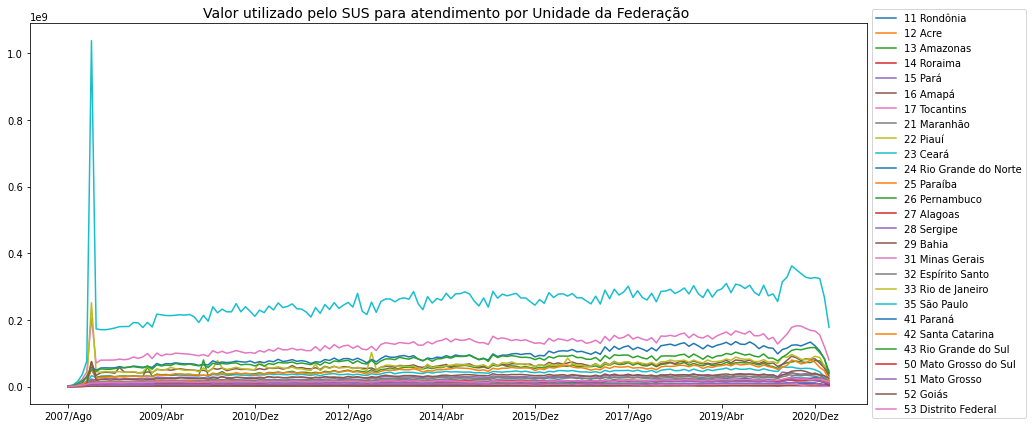

In [279]:
#Para plotar vamos remover a linha Total e transpor as linhas e colunas
usaveis = usaveis.drop("Total", axis=1)
ax = usaveis.T.plot(figsize=(15, 7))
ax.legend(bbox_to_anchor=(1,1.05))
plt.title("Valor utilizado pelo SUS para atendimento por Unidade da Federação ", size=14)
plt.show()

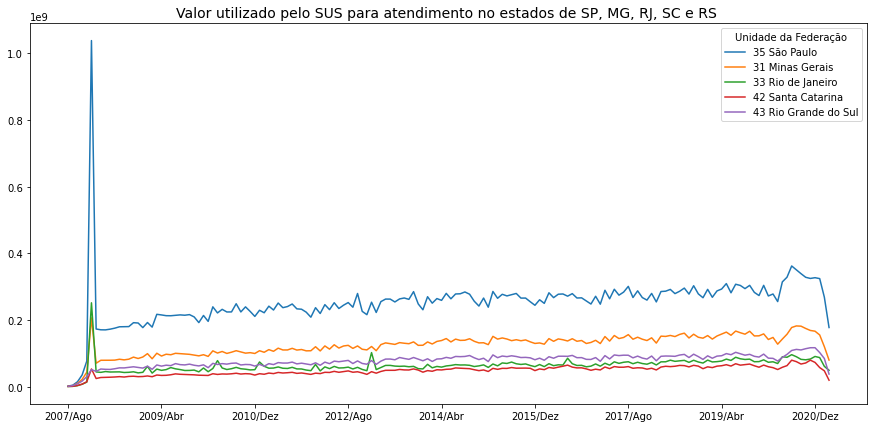

In [280]:
#Selecionar 5 estados e plotar
ax = usaveis.loc[["35 São Paulo", "31 Minas Gerais", "33 Rio de Janeiro", "42 Santa Catarina", "43 Rio Grande do Sul"]].T.plot(figsize=(15, 7))
plt.title("Valor utilizado pelo SUS para atendimento no estados de SP, MG, RJ, SC e RS ", size=14)
plt.show()

### Aula 03

<AxesSubplot:>

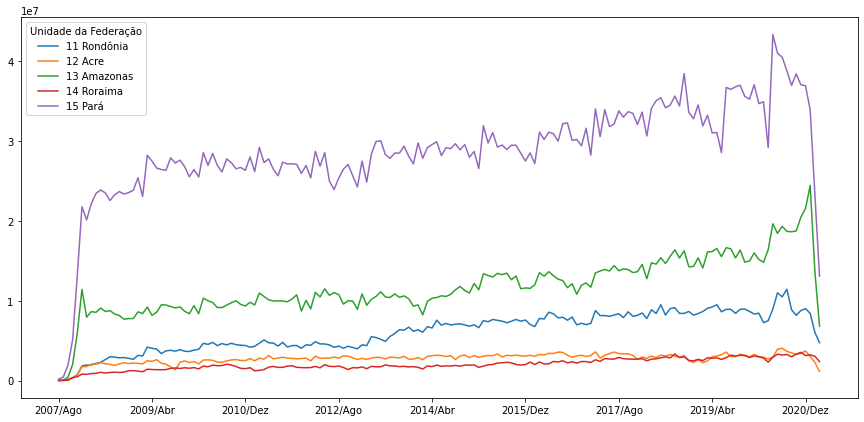

In [281]:
#Selecionar os 5 primeiros estados
usaveis[:5].T.plot(figsize=(15, 7))

<AxesSubplot:>

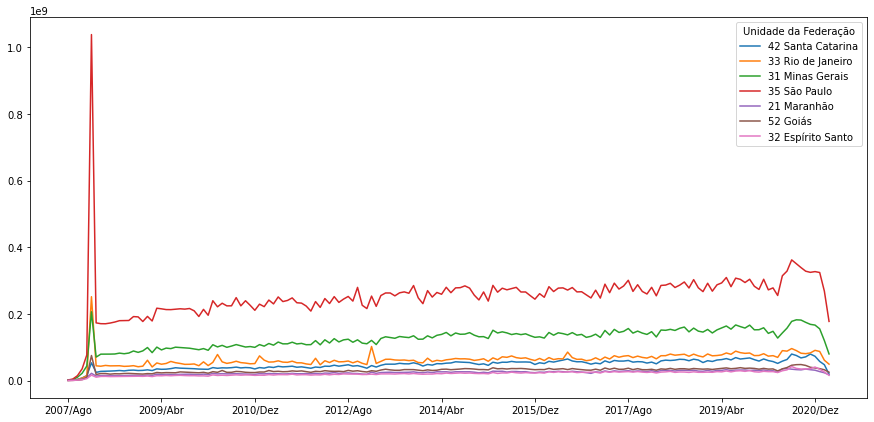

In [282]:
#7 estados aleatórios
usaveis.sample(n=7).T.plot(figsize=(15, 7))

<AxesSubplot:>

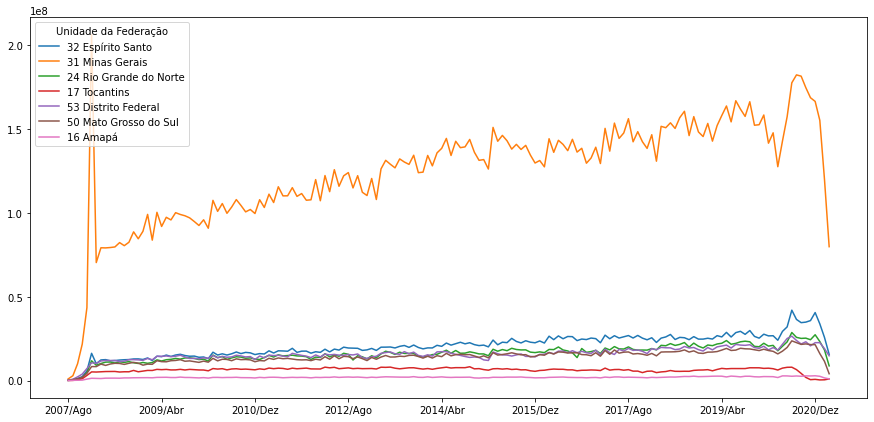

In [283]:
#para ter o mesmo resultado usando estados aleatórios, precisamos usar uma semente
#vamos utilizar o numpy
import numpy as np 
np.random.seed(687942)

usaveis.sample(n=7).T.plot(figsize=(15, 7))

In [284]:
#plotar os 5 estados com valor mais alto
#1 - adicionar uma coluna com o valor total de cada estado
#2 - fazer um sort descendente nesta coluna
#3 - pegar as 5 primeiras linhas

#1 - adicionar uma coluna com o valor total de cada estado
usaveis["Total"] = usaveis.sum(axis=1)

In [285]:
#2 - fazer um sort descendente nesta coluna
ordenado_por_total = usaveis.sort_values(by=["Total"], ascending=False)

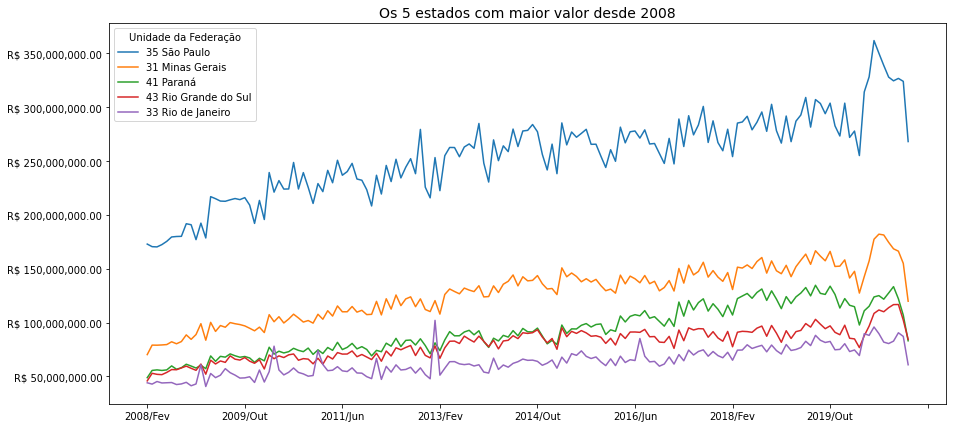

In [286]:
#3 - pegar as 5 primeiras linhas (ordenadas pelo valor total previamente) e nã incluir a coluna Total no gráfico
#Decidi remover as primeiras colunas por causa de outliers
ax = ordenado_por_total.iloc[0:5,6:-2].T.plot(figsize=(15, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Os 5 estados com maior valor desde 2008", size=14)
plt.show()

In [287]:
#Criar uma coluna de Região
#1-Norte, 2-Nordeste, 3-Sudeste, 4-Sul, 5-Centro-Oeste

#Criar a coluna região somente com primeiro caracter, que já identifica a região
usaveis["Região"] = usaveis.index.str.slice(0,1)
usaveis["Região"]

#criando um dicionario com o id de cada região para usar como parâmetro de substituição
dicionario_regiao = {"1": "Norte", "2": "Nordeste", "3": "Sudeste", "4": "Sul", "5": "Centro-Oeste"}

for chave in dicionario_regiao:
    usaveis["Região"] = usaveis["Região"].replace(chave, dicionario_regiao[chave])

usaveis[["Região"]]    

Região
Unidade da Federação                
11 Rondônia                    Norte
12 Acre                        Norte
13 Amazonas                    Norte
14 Roraima                     Norte
15 Pará                        Norte
16 Amapá                       Norte
17 Tocantins                   Norte
21 Maranhão                 Nordeste
22 Piauí                    Nordeste
23 Ceará                    Nordeste
24 Rio Grande do Norte      Nordeste
25 Paraíba                  Nordeste
26 Pernambuco               Nordeste
27 Alagoas                  Nordeste
28 Sergipe                  Nordeste
29 Bahia                    Nordeste
31 Minas Gerais              Sudeste
32 Espírito Santo            Sudeste
33 Rio de Janeiro            Sudeste
35 São Paulo                 Sudeste
41 Paraná                        Sul
42 Santa Catarina                Sul
43 Rio Grande do Sul             Sul
50 Mato Grosso do Sul   Centro-Oeste
51 Mato Grosso          Centro-Oeste
52 Goiás                Centro-Oeste
53 Distrito Federal     Centro-Oeste

### Aula 04

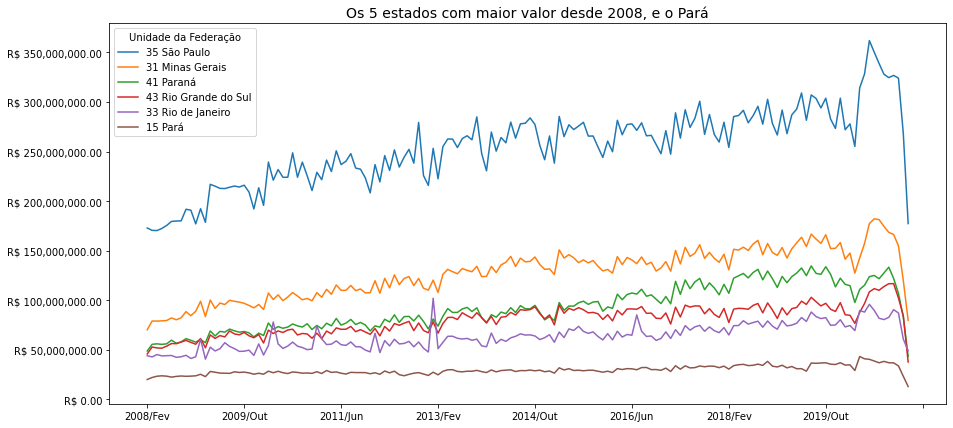

In [288]:
#adicionar um estado aleatorio ao gráfico acima, sem ser o sexto estado com o valor mais alto
#estado escolhido: 15 Pará
seis_estados_por_total = usaveis.sort_values(by=["Total"], ascending=False)
seis_estados_por_total = seis_estados_por_total[0:5]
seis_estados_por_total = seis_estados_por_total.append(usaveis.loc["15 Pará",:])
ax = seis_estados_por_total.iloc[:,6:-2].T.plot(figsize=(15, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Os 5 estados com maior valor desde 2008, e o Pará", size=14)
plt.show()

In [289]:
#Quando foi o surto de zica e chikungunya no Brasil?
#"O surto de vírus Zika foi o maior surto desse tipo de vírus da história, que ocorreu entre abril de 2015 e novembro de 2016."
#Fonte: https://pt.wikipedia.org/wiki/Epidemia_de_febre_zica_em_2015%E2%80%932016


In [290]:
# Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns #estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue


In [291]:
#Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento #similar em todos os demais estados da região

### Aula 05

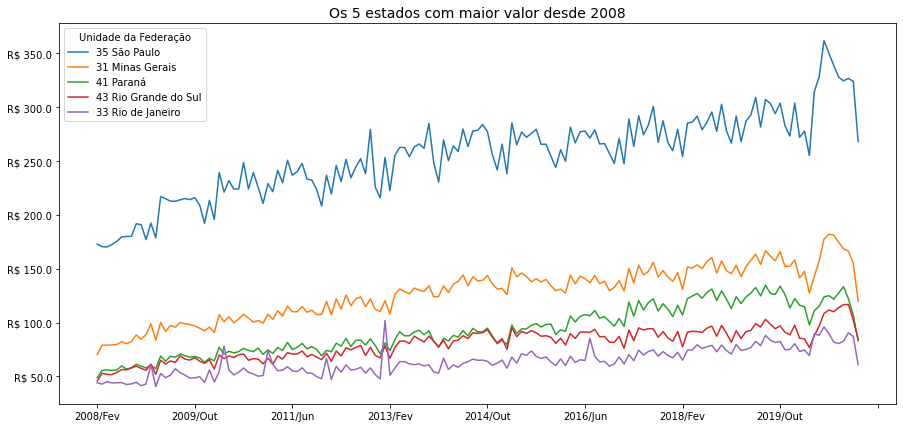

In [292]:
# deixar o eixo y em milhões
ordenado_por_total = ordenado_por_total / 1000000
ax = ordenado_por_total.iloc[0:5,6:-2].T.plot(figsize=(15, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x}"))
plt.title("Os 5 estados com maior valor desde 2008", size=14)
plt.show()

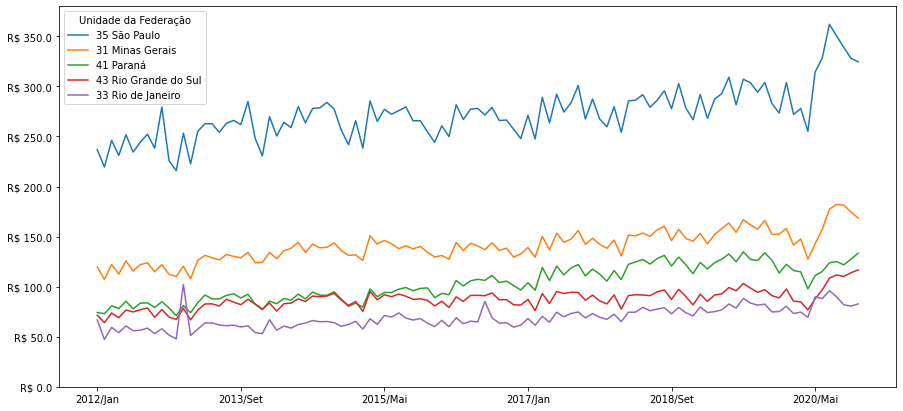

In [293]:
#Trabalhando com o eixo y 
meses_filtrados = ordenado_por_total[ordenado_por_total.columns[53:160]]
ax = meses_filtrados.head().T.plot(figsize=(15, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x}"))
plt.ylim(0,380)
plt.show()

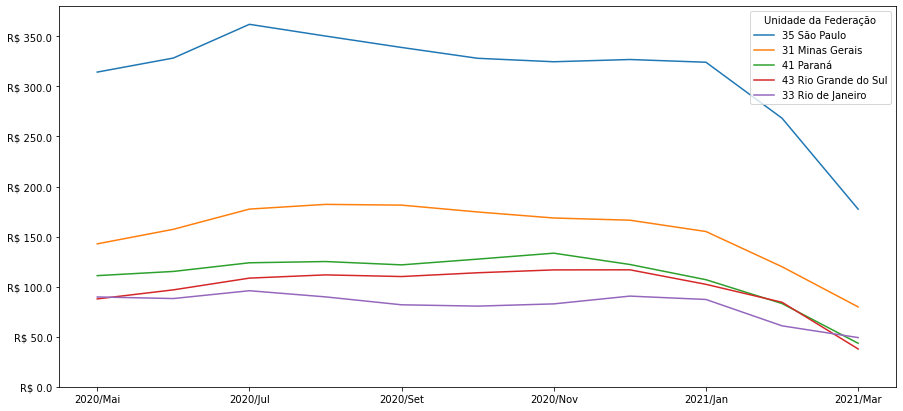

In [294]:
#Trabalhando com o eixo x
meses_filtrados = ordenado_por_total[ordenado_por_total.columns[-12:-1]]
ax = meses_filtrados.head().T.plot(figsize=(15, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x}"))
plt.ylim(0,380)
plt.show()

In [295]:
#Mês mais recente
mes_mais_recente = ordenado_por_total.columns[-2]
print(mes_mais_recente)
gastos_mes_mais_recente = ordenado_por_total[mes_mais_recente]
print(gastos_mes_mais_recente.head())

2021/Mar
Unidade da Federação
35 São Paulo           177.41
31 Minas Gerais         79.78
41 Paraná               43.48
43 Rio Grande do Sul    37.80
33 Rio de Janeiro       49.15
Name: 2021/Mar, dtype: float64


<AxesSubplot:ylabel='2021/Mar'>

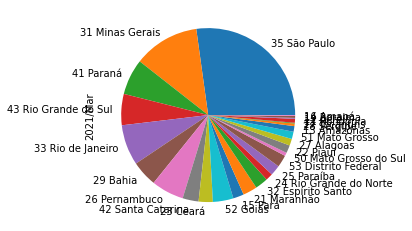

In [296]:
#trabalhando (ou não) com gráfico de pizza
gastos_mes_mais_recente.plot(kind="pie")

#problemas deste gráfico:
    # legenda ilegível
    # muitas divisões

In [297]:
#Comparar os gastos do mês mais recente com o RS
gastos_mes_mais_recente / gastos_mes_mais_recente["43 Rio Grande do Sul"]

Unidade da Federação
35 São Paulo             4.69
31 Minas Gerais          2.11
41 Paraná                1.15
43 Rio Grande do Sul     1.00
33 Rio de Janeiro        1.30
29 Bahia                 0.83
26 Pernambuco            1.04
42 Santa Catarina        0.51
23 Ceará                 0.45
52 Goiás                 0.66
15 Pará                  0.35
21 Maranhão              0.46
32 Espírito Santo        0.41
24 Rio Grande do Norte   0.23
25 Paraíba               0.33
53 Distrito Federal      0.39
50 Mato Grosso do Sul    0.11
22 Piauí                 0.25
27 Alagoas               0.22
51 Mato Grosso           0.23
13 Amazonas              0.18
28 Sergipe               0.08
17 Tocantins             0.02
11 Rondônia              0.13
12 Acre                  0.03
14 Roraima               0.06
16 Amapá                 0.03
Name: 2021/Mar, dtype: float64

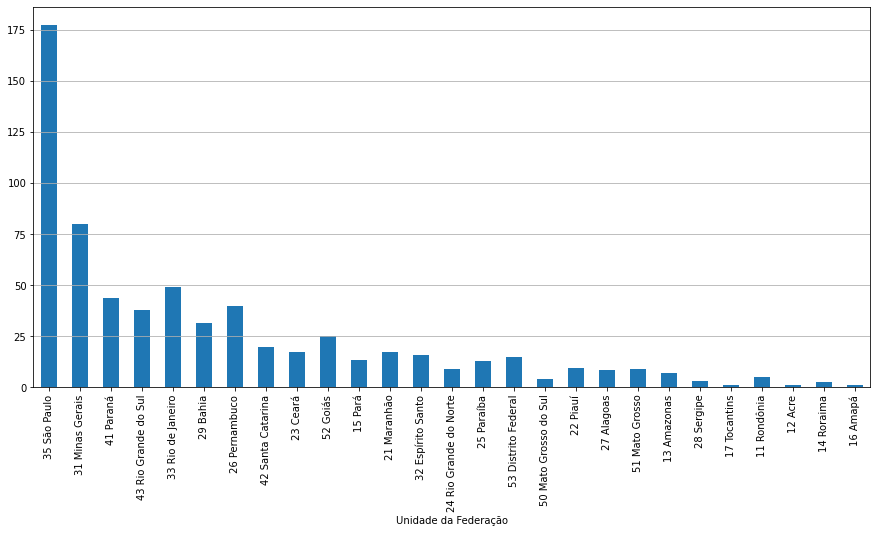

In [298]:
#plotar gráfico comparativo do mês mais recente
#está ordenado pelo gasto total geral, e não pelo mês mais recente
gastos_mes_mais_recente.plot(kind="bar", figsize=(15, 7))
plt.grid(axis="y")

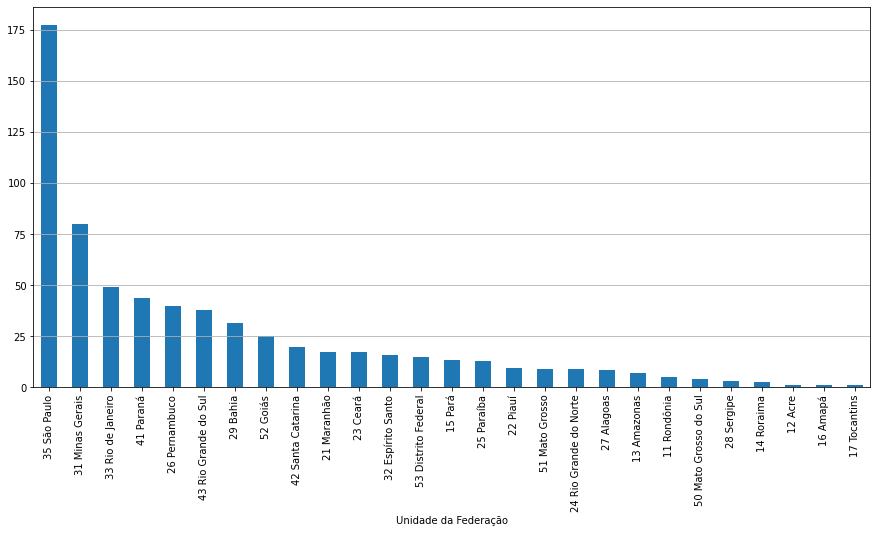

In [299]:
#ordenar pelo total de gasto do mês mais recente
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.plot(kind="bar", figsize=(15, 7))
plt.grid(axis="y")

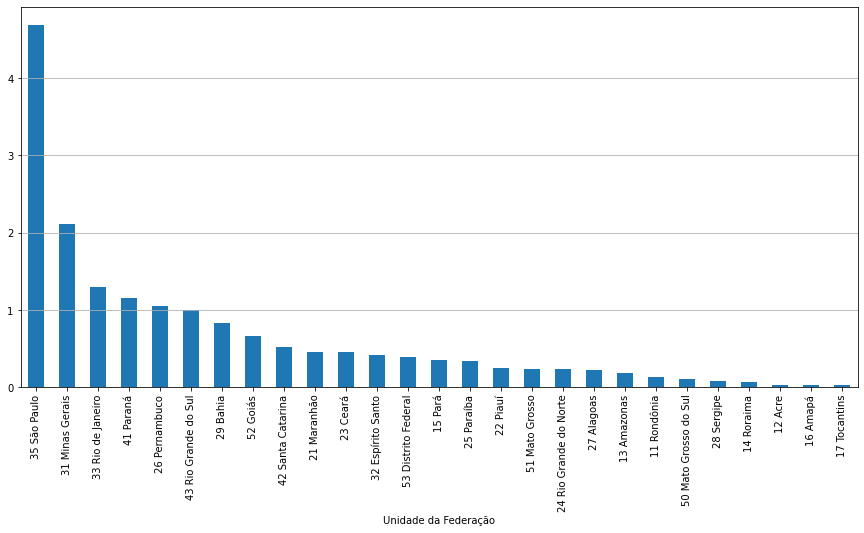

In [300]:
#plotar o gasto em relação aos gastos do estado RS no mês mais recente
gastos_mes_mais_recente_RS = gastos_mes_mais_recente/gastos_mes_mais_recente["43 Rio Grande do Sul"]
gastos_mes_mais_recente_RS = gastos_mes_mais_recente_RS.sort_values(ascending=False)
gastos_mes_mais_recente_RS.plot(kind="bar", figsize=(15, 7))
plt.grid(axis="y")

## Módulo 02

### Aula 01

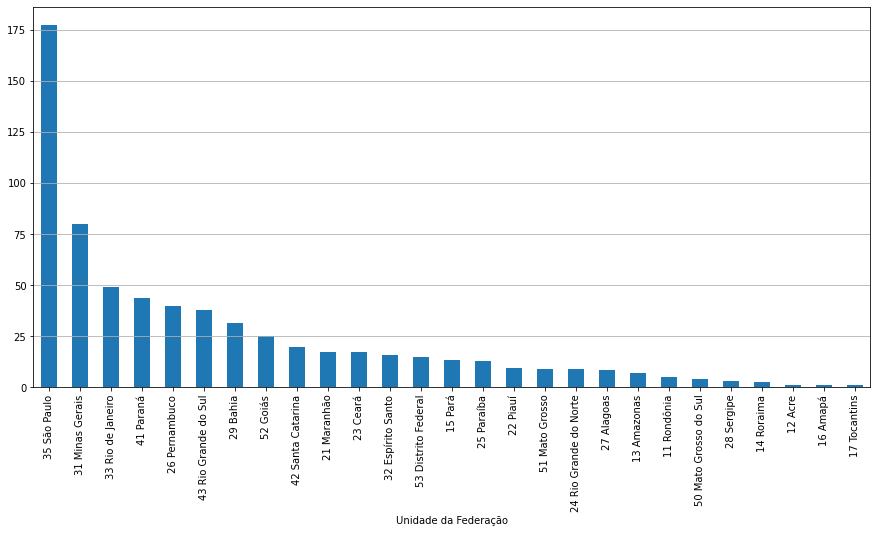

In [301]:
#ordenar pelo total de gasto do mês mais recente
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.plot(kind="bar", figsize=(15, 7))
plt.grid(axis="y")

In [302]:
gastos_mes_mais_recente.sum()

652.42024787

In [303]:
#comparar o valor de cada estado pelo valor total, nos dando a taxa de gastos
gastos_mes_mais_recente / gastos_mes_mais_recente.sum()

Unidade da Federação
35 São Paulo             0.27
31 Minas Gerais          0.12
33 Rio de Janeiro        0.08
41 Paraná                0.07
26 Pernambuco            0.06
43 Rio Grande do Sul     0.06
29 Bahia                 0.05
52 Goiás                 0.04
42 Santa Catarina        0.03
21 Maranhão              0.03
23 Ceará                 0.03
32 Espírito Santo        0.02
53 Distrito Federal      0.02
15 Pará                  0.02
25 Paraíba               0.02
22 Piauí                 0.01
51 Mato Grosso           0.01
24 Rio Grande do Norte   0.01
27 Alagoas               0.01
13 Amazonas              0.01
11 Rondônia              0.01
50 Mato Grosso do Sul    0.01
28 Sergipe               0.00
14 Roraima               0.00
12 Acre                  0.00
16 Amapá                 0.00
17 Tocantins             0.00
Name: 2021/Mar, dtype: float64

<AxesSubplot:xlabel='Unidade da Federação'>

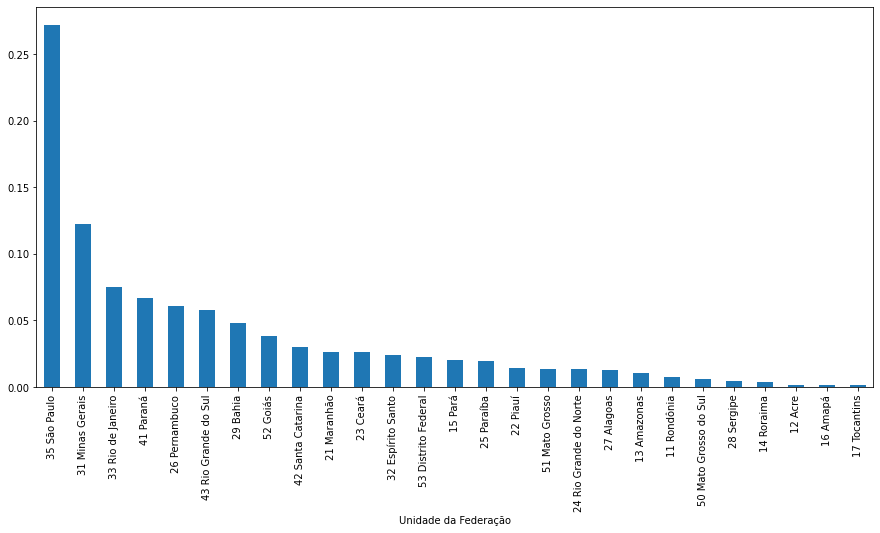

In [304]:
#comparar o valor de cada estado pelo valor total, nos dando o percentual por estado de gastos
gastos_proporcionais = gastos_mes_mais_recente / gastos_mes_mais_recente.sum()
gastos_proporcionais.plot(kind="bar", figsize=(15, 7))

In [305]:
#buscar os dados de número de habitantes por estado para verificar, como o último censo foi em 2010 nós utilizaremos a estimativa
#da população disponível em https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados
#vamos subir a tabela obtida no github e ler a partir de lá
ibge_estimativa = pd.read_excel("https://github.com/cmattosr/bootcampDS_Mod02/raw/main/dados/POP2020_20210331.xls")
ibge_estimativa.head()


ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020  \
0                     BRASIL E UNIDADES DA FEDERAÇÃO                                                                   
1                                             Brasil                                                                   
2                                       Região Norte                                                                   
3                                           Rondônia                                                                   
4                                               Acre                                                                   

   Unnamed: 1          Unnamed: 2  
0         NaN  POPULAÇÃO ESTIMADA  
1         NaN           211755692  
2         NaN            18672591  
3         NaN             1796460  
4         NaN              894470

In [306]:
#vamos pegar os dados populacionais por unidade da federação da Wikipedia 
#(copiar e colar de https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""


In [307]:
#vamos ler o conteúdo da Wikipedia que foi colocado na variável dados_da_populacao
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)
dados_da_populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
display(dados_da_populacao)

Posição    Unidade federativa   População % da pop. total  \
0   (habitantes)                   NaN         NaN             NaN   
1              1             São Paulo  46 289 333           21,9%   
2              2          Minas Gerais  21 292 666           10,1%   
3              3        Rio de Janeiro  17 366 189            8,2%   
4              4           Bahia Bahia  14 930 634            7,1%   
5              5                Paraná  11 516 840            5,4%   
6              6     Rio Grande do Sul  11 422 973            5,4%   
7              7            Pernambuco   9 616 621            4,5%   
8              8                 Ceará   9 187 103            4,3%   
9              9             Pará Pará   8 690 745            4,1%   
10            10        Santa Catarina   7 252 502            3,4%   
11            11              Maranhão   7 114 598            3,4%   
12            12                 Goiás   7 113 540            3,4%   
13            13              Amazonas   4 207 714            2,0%   
14            14        Espírito Santo   4 064 052            1,9%   
15            15               Paraíba   4 039 277            1,9%   
16            16   Rio Grande do Norte   3 534 165            1,7%   
17            17           Mato Grosso   3 526 220            1,7%   
18            18               Alagoas   3 351 543            1,6%   
19            19                 Piauí   3 281 480            1,6%   
20            20      Distrito Federal   3 055 149            1,4%   
21            21    Mato Grosso do Sul   2 809 394            1,3%   
22            22               Sergipe   2 318 822            1,1%   
23            23              Rondônia   1 796 460            0,8%   
24            24             Tocantins   1 590 248            0,7%   
25            25                  Acre     894 470            0,4%   
26            26                 Amapá     861 773            0,4%   
27            27               Roraima     631 181            0,3%   

                           País comparável  
0                                      NaN  
1   Flag of Spain.svg Espanha (46 439 864)  
2                   Sri Lanka (20 675 000)  
3               Países Baixos (16 922 900)  
4                       Chade (14 037 000)  
5                     Bolívia (11 410 651)  
6                     Bélgica (11 250 659)  
7                 Bielorrússia (9 485 300)  
8       Emirados Árabes Unidos (9 157 000)  
9                      Áustria (8 602 112)  
10                      Sérvia (7 114 393)  
11                    Paraguai (7 003 406)  
12                    Paraguai (7 003 406)  
13                      Líbano (4 168 000)  
14                      Líbano (4 168 000)  
15                      Líbano (4 168 000)  
16                     Uruguai (3 415 866)  
17                     Uruguai (3 415 866)  
18                     Uruguai (3 415 866)  
19                      Kuwait (3 268 431)  
20                    Lituânia (2 900 787)  
21                     Jamaica (2 717 991)  
22                     Namíbia (2 280 700)  
23                       Gabão (1 725 000)  
24                     Bahrein (1 359 800)  
25                          Fiji (859 178)  
26                          Fiji (859 178)  
27                    Luxemburgo (562 958)

### Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia

In [308]:
populacao_wikipedia_direto = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
#Há 3 tabelas nesta página e o comando acima lerá todas elas, como a primeira tabela é a que nos interssa vamos pegar o dataframe com índice 0
populacao_wikipedia_direto = populacao_wikipedia_direto[0]
display(populacao_wikipedia_direto)

Posição   Unidade federativa   População % da pop. total  \
0         1            São Paulo  46 289 333           21,9%   
1         2         Minas Gerais  21 292 666           10,1%   
2         3       Rio de Janeiro  17 366 189            8,2%   
3         4                Bahia  14 930 634            7,1%   
4         5               Paraná  11 516 840            5,4%   
5         6    Rio Grande do Sul  11 422 973            5,4%   
6         7           Pernambuco   9 616 621            4,5%   
7         8                Ceará   9 187 103            4,3%   
8         9                 Pará   8 690 745            4,1%   
9        10       Santa Catarina   7 252 502            3,4%   
10       11             Maranhão   7 114 598            3,4%   
11       12                Goiás   7 113 540            3,4%   
12       13             Amazonas   4 207 714            2,0%   
13       14       Espírito Santo   4 064 052            1,9%   
14       15              Paraíba   4 039 277            1,9%   
15       16  Rio Grande do Norte   3 534 165            1,7%   
16       17          Mato Grosso   3 526 220            1,7%   
17       18              Alagoas   3 351 543            1,6%   
18       19                Piauí   3 281 480            1,6%   
19       20     Distrito Federal   3 055 149            1,4%   
20       21   Mato Grosso do Sul   2 809 394            1,3%   
21       22              Sergipe   2 318 822            1,1%   
22       23             Rondônia   1 796 460            0,8%   
23       24            Tocantins   1 590 248            0,7%   
24       25                 Acre     894 470            0,4%   
25       26                Amapá     861 773            0,4%   
26       27              Roraima     631 181            0,3%   

          País comparável (habitantes)  
0                 Espanha (46 439 864)  
1               Sri Lanka (20 675 000)  
2           Países Baixos (16 922 900)  
3                   Chade (14 037 000)  
4                 Bolívia (11 410 651)  
5                 Bélgica (11 250 659)  
6             Bielorrússia (9 485 300)  
7   Emirados Árabes Unidos (9 157 000)  
8                  Áustria (8 602 112)  
9                   Sérvia (7 114 393)  
10                Paraguai (7 003 406)  
11                Paraguai (7 003 406)  
12                  Líbano (4 168 000)  
13                  Líbano (4 168 000)  
14                  Líbano (4 168 000)  
15                 Uruguai (3 415 866)  
16                 Uruguai (3 415 866)  
17                 Uruguai (3 415 866)  
18                  Kuwait (3 268 431)  
19                Lituânia (2 900 787)  
20                 Jamaica (2 717 991)  
21                 Namíbia (2 280 700)  
22                   Gabão (1 725 000)  
23                 Bahrein (1 359 800)  
24                      Fiji (859 178)  
25                      Fiji (859 178)  
26                Luxemburgo (562 958)

### Desafio 02 - Neste desafio temos uma série de passos:

Padronizar os nomes das colunas <br>
Transformar os dados nos tipos corretos <br>
Transformar a UF em index <br>

In [309]:
#Mudar o nome da coluna "Unidade federativa" para "DF"
#Mudar o nome da coluna "População" para "Populacao"
dados_da_populacao = dados_da_populacao.rename(columns={"Unidade federativa": "UF", "População": "Populacao"})
dados_da_populacao

Posição                    UF   Populacao % da pop. total  \
0   (habitantes)                   NaN         NaN             NaN   
1              1             São Paulo  46 289 333           21,9%   
2              2          Minas Gerais  21 292 666           10,1%   
3              3        Rio de Janeiro  17 366 189            8,2%   
4              4           Bahia Bahia  14 930 634            7,1%   
5              5                Paraná  11 516 840            5,4%   
6              6     Rio Grande do Sul  11 422 973            5,4%   
7              7            Pernambuco   9 616 621            4,5%   
8              8                 Ceará   9 187 103            4,3%   
9              9             Pará Pará   8 690 745            4,1%   
10            10        Santa Catarina   7 252 502            3,4%   
11            11              Maranhão   7 114 598            3,4%   
12            12                 Goiás   7 113 540            3,4%   
13            13              Amazonas   4 207 714            2,0%   
14            14        Espírito Santo   4 064 052            1,9%   
15            15               Paraíba   4 039 277            1,9%   
16            16   Rio Grande do Norte   3 534 165            1,7%   
17            17           Mato Grosso   3 526 220            1,7%   
18            18               Alagoas   3 351 543            1,6%   
19            19                 Piauí   3 281 480            1,6%   
20            20      Distrito Federal   3 055 149            1,4%   
21            21    Mato Grosso do Sul   2 809 394            1,3%   
22            22               Sergipe   2 318 822            1,1%   
23            23              Rondônia   1 796 460            0,8%   
24            24             Tocantins   1 590 248            0,7%   
25            25                  Acre     894 470            0,4%   
26            26                 Amapá     861 773            0,4%   
27            27               Roraima     631 181            0,3%   

                           País comparável  
0                                      NaN  
1   Flag of Spain.svg Espanha (46 439 864)  
2                   Sri Lanka (20 675 000)  
3               Países Baixos (16 922 900)  
4                       Chade (14 037 000)  
5                     Bolívia (11 410 651)  
6                     Bélgica (11 250 659)  
7                 Bielorrússia (9 485 300)  
8       Emirados Árabes Unidos (9 157 000)  
9                      Áustria (8 602 112)  
10                      Sérvia (7 114 393)  
11                    Paraguai (7 003 406)  
12                    Paraguai (7 003 406)  
13                      Líbano (4 168 000)  
14                      Líbano (4 168 000)  
15                      Líbano (4 168 000)  
16                     Uruguai (3 415 866)  
17                     Uruguai (3 415 866)  
18                     Uruguai (3 415 866)  
19                      Kuwait (3 268 431)  
20                    Lituânia (2 900 787)  
21                     Jamaica (2 717 991)  
22                     Namíbia (2 280 700)  
23                       Gabão (1 725 000)  
24                     Bahrein (1 359 800)  
25                          Fiji (859 178)  
26                          Fiji (859 178)  
27                    Luxemburgo (562 958)

In [310]:
#remover a primeira linha com os valores NaN
#dados_da_populacao = dados_da_populacao.iloc[0].drop()
dados_da_populacao = dados_da_populacao[1:]
dados_da_populacao

Posição                    UF   Populacao % da pop. total  \
1        1             São Paulo  46 289 333           21,9%   
2        2          Minas Gerais  21 292 666           10,1%   
3        3        Rio de Janeiro  17 366 189            8,2%   
4        4           Bahia Bahia  14 930 634            7,1%   
5        5                Paraná  11 516 840            5,4%   
6        6     Rio Grande do Sul  11 422 973            5,4%   
7        7            Pernambuco   9 616 621            4,5%   
8        8                 Ceará   9 187 103            4,3%   
9        9             Pará Pará   8 690 745            4,1%   
10      10        Santa Catarina   7 252 502            3,4%   
11      11              Maranhão   7 114 598            3,4%   
12      12                 Goiás   7 113 540            3,4%   
13      13              Amazonas   4 207 714            2,0%   
14      14        Espírito Santo   4 064 052            1,9%   
15      15               Paraíba   4 039 277            1,9%   
16      16   Rio Grande do Norte   3 534 165            1,7%   
17      17           Mato Grosso   3 526 220            1,7%   
18      18               Alagoas   3 351 543            1,6%   
19      19                 Piauí   3 281 480            1,6%   
20      20      Distrito Federal   3 055 149            1,4%   
21      21    Mato Grosso do Sul   2 809 394            1,3%   
22      22               Sergipe   2 318 822            1,1%   
23      23              Rondônia   1 796 460            0,8%   
24      24             Tocantins   1 590 248            0,7%   
25      25                  Acre     894 470            0,4%   
26      26                 Amapá     861 773            0,4%   
27      27               Roraima     631 181            0,3%   

                           País comparável  
1   Flag of Spain.svg Espanha (46 439 864)  
2                   Sri Lanka (20 675 000)  
3               Países Baixos (16 922 900)  
4                       Chade (14 037 000)  
5                     Bolívia (11 410 651)  
6                     Bélgica (11 250 659)  
7                 Bielorrússia (9 485 300)  
8       Emirados Árabes Unidos (9 157 000)  
9                      Áustria (8 602 112)  
10                      Sérvia (7 114 393)  
11                    Paraguai (7 003 406)  
12                    Paraguai (7 003 406)  
13                      Líbano (4 168 000)  
14                      Líbano (4 168 000)  
15                      Líbano (4 168 000)  
16                     Uruguai (3 415 866)  
17                     Uruguai (3 415 866)  
18                     Uruguai (3 415 866)  
19                      Kuwait (3 268 431)  
20                    Lituânia (2 900 787)  
21                     Jamaica (2 717 991)  
22                     Namíbia (2 280 700)  
23                       Gabão (1 725 000)  
24                     Bahrein (1 359 800)  
25                          Fiji (859 178)  
26                          Fiji (859 178)  
27                    Luxemburgo (562 958)

In [311]:
#o campo com o número de habitantes de ser numérico

#remover espaço
dados_da_populacao["Populacao"] = dados_da_populacao["Populacao"].str.replace(" ","")
#transformar em int
dados_da_populacao["Populacao"] = pd.to_numeric(dados_da_populacao["Populacao"])

<ipython-input-311-153505dd66c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_da_populacao["Populacao"] = dados_da_populacao["Populacao"].str.replace(" ","")
<ipython-input-311-153505dd66c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_da_populacao["Populacao"] = pd.to_numeric(dados_da_populacao["Populacao"])


In [312]:
dados_da_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 1 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Posição          27 non-null     object
 1   UF               27 non-null     object
 2   Populacao        27 non-null     int64 
 3   % da pop. total  27 non-null     object
 4   País comparável  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [313]:
#Deixar apenas as colunas UF e Populacao no dataframe
dados_da_populacao = dados_da_populacao[["UF", "Populacao"]]
dados_da_populacao

UF  Populacao
1              São Paulo   46289333
2           Minas Gerais   21292666
3         Rio de Janeiro   17366189
4            Bahia Bahia   14930634
5                 Paraná   11516840
6      Rio Grande do Sul   11422973
7             Pernambuco    9616621
8                  Ceará    9187103
9              Pará Pará    8690745
10        Santa Catarina    7252502
11              Maranhão    7114598
12                 Goiás    7113540
13              Amazonas    4207714
14        Espírito Santo    4064052
15               Paraíba    4039277
16   Rio Grande do Norte    3534165
17           Mato Grosso    3526220
18               Alagoas    3351543
19                 Piauí    3281480
20      Distrito Federal    3055149
21    Mato Grosso do Sul    2809394
22               Sergipe    2318822
23              Rondônia    1796460
24             Tocantins    1590248
25                  Acre     894470
26                 Amapá     861773
27               Roraima     631181

In [314]:
#transformar a coluna UF em índice
dados_da_populacao = dados_da_populacao.set_index("UF")
dados_da_populacao 

Populacao
UF                             
 São Paulo             46289333
 Minas Gerais          21292666
 Rio de Janeiro        17366189
Bahia Bahia            14930634
 Paraná                11516840
 Rio Grande do Sul     11422973
 Pernambuco             9616621
 Ceará                  9187103
Pará Pará               8690745
 Santa Catarina         7252502
 Maranhão               7114598
 Goiás                  7113540
 Amazonas               4207714
 Espírito Santo         4064052
 Paraíba                4039277
 Rio Grande do Norte    3534165
 Mato Grosso            3526220
 Alagoas                3351543
 Piauí                  3281480
 Distrito Federal       3055149
 Mato Grosso do Sul     2809394
 Sergipe                2318822
 Rondônia               1796460
 Tocantins              1590248
 Acre                    894470
 Amapá                   861773
 Roraima                 631181

In [315]:
dados_da_populacao.shape

(27, 1)

### Aula 02

In [316]:
#cruzar os dados de "gastos_mes_mais_recente" e "dados_da_populacao"
#antes precisamos tratar os índices para que sejam iguais em ammbas as tabelas e permitir o join

#retirar o número antes do nome do estado em "gastos_mes_mais_recente"
gastos_mes_mais_recente.index = gastos_mes_mais_recente.index.str[3:]
gastos_mes_mais_recente


Unidade da Federação
São Paulo             177.41
Minas Gerais           79.78
Rio de Janeiro         49.15
Paraná                 43.48
Pernambuco             39.47
Rio Grande do Sul      37.80
Bahia                  31.31
Goiás                  24.87
Santa Catarina         19.38
Maranhão               17.29
Ceará                  17.17
Espírito Santo         15.61
Distrito Federal       14.73
Pará                   13.07
Paraíba                12.52
Piauí                   9.54
Mato Grosso             8.84
Rio Grande do Norte     8.73
Alagoas                 8.18
Amazonas                6.80
Rondônia                4.73
Mato Grosso do Sul      4.04
Sergipe                 3.08
Roraima                 2.38
Acre                    1.14
Amapá                   0.99
Tocantins               0.93
Name: 2021/Mar, dtype: float64

In [317]:
#quando olhamos os índices das duas tabelas notamos que há espaço em branco antes do nome de alguns estados em dados_da_populacao
print(gastos_mes_mais_recente.index)
print(dados_da_populacao.index)

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Paraná', 'Pernambuco',
       'Rio Grande do Sul', 'Bahia', 'Goiás', 'Santa Catarina', 'Maranhão',
       'Ceará', 'Espírito Santo', 'Distrito Federal', 'Pará', 'Paraíba',
       'Piauí', 'Mato Grosso', 'Rio Grande do Norte', 'Alagoas', 'Amazonas',
       'Rondônia', 'Mato Grosso do Sul', 'Sergipe', 'Roraima', 'Acre', 'Amapá',
       'Tocantins'],
      dtype='object', name='Unidade da Federação')
Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='UF')


In [318]:
#retirar os espaços do índice de "dados_da_populacao"
dados_da_populacao.index = dados_da_populacao.index.str.strip()
print(dados_da_populacao.index)

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='UF')


In [319]:
#há estados que estão com nomes repetidos em "dados_da_populacao" (Bahia e Pará), precisamos tratar
for estado in gastos_mes_mais_recente.index:
    dados_da_populacao.index = dados_da_populacao.index.str.replace(f"{estado} {estado}", estado)
dados_da_populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='UF')

In [320]:
#agora podemos fazer o join
gastos_e_populacao_recentes = dados_da_populacao.join(gastos_mes_mais_recente)

### Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

### Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [321]:
#gerando as duas tabelas novamente adicionando "_desafio04" no nome delas, refazendo alguns passos anteriores
gastos_mes_mais_recente_desafio04 = ordenado_por_total[mes_mais_recente]
dados_da_populacao_desafio04 = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
dados_da_populacao_desafio04 = dados_da_populacao_desafio04[0]


In [322]:
print(gastos_mes_mais_recente_desafio04)
print(dados_da_populacao_desafio04)

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64
    Posição   Unidade federativa   População % da pop. total  \
0         1         

In [323]:
#vamos chamar a função que fará a limpeza e união das tabelas, e devolverá uma tabela integrada
unida = limpeza_tabelas(dados_da_populacao_desafio04, gastos_mes_mais_recente_desafio04)
display(unida)

Populacao  2021/Mar
UF                                      
São Paulo             46289333    177.41
Minas Gerais          21292666     79.78
Rio de Janeiro        17366189     49.15
Bahia                 14930634     31.31
Paraná                11516840     43.48
Rio Grande do Sul     11422973     37.80
Pernambuco             9616621     39.47
Ceará                  9187103     17.17
Pará                   8690745     13.07
Santa Catarina         7252502     19.38
Maranhão               7114598     17.29
Goiás                  7113540     24.87
Amazonas               4207714      6.80
Espírito Santo         4064052     15.61
Paraíba                4039277     12.52
Rio Grande do Norte    3534165      8.73
Mato Grosso            3526220      8.84
Alagoas                3351543      8.18
Piauí                  3281480      9.54
Distrito Federal       3055149     14.73
Mato Grosso do Sul     2809394      4.04
Sergipe                2318822      3.08
Rondônia               1796460      4.73
Tocantins              1590248      0.93
Acre                    894470      1.14
Amapá                   861773      0.99
Roraima                 631181      2.38

In [324]:
unida.shape

(27, 2)

### Aula 03 - Visualização de Dados

<AxesSubplot:xlabel='UF'>

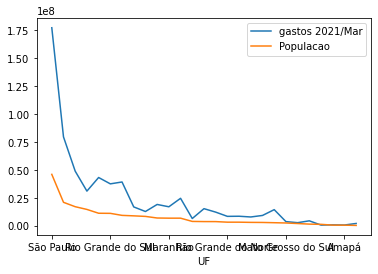

In [325]:
#vamos continuar com a tabela "gastos_e_populacao_recentes"
#exemplo de gráfico horripilante
#gastos_e_populacao_recentes["gastos"] = gastos_e_populacao_recentes["2021/Mar"] * 1000000
gastos_e_populacao_recentes = gastos_e_gasto_por_habitante(gastos_e_populacao_recentes, "2021/Mar")
gastos_e_populacao_recentes[["gastos 2021/Mar", "Populacao"]].plot()


In [326]:
#no gráfico acima, parace que São Paulo gasta muityo mais por habitante do que o Rio Grande do Sul
#vamos comparar
#gasto por habitante do Rio Grande do Sul
print("RS:", gastos_e_populacao_recentes.loc["Rio Grande do Sul", "gastos 2021/Mar"]/ gastos_e_populacao_recentes.loc["Rio Grande do Sul", "Populacao"])
#gasto por habitante de São Paulo
print("SP:", gastos_e_populacao_recentes.loc["São Paulo", "gastos 2021/Mar"]/ gastos_e_populacao_recentes.loc["São Paulo", "Populacao"])

RS: 3.309018834238687
SP: 3.832596112586025


In [327]:
#vamos criar uma coluna calculando o gasto por habitante
#gastos_e_populacao_recentes["gasto por habitante"] = gastos_e_populacao_recentes["gastos"]/ gastos_e_populacao_recentes["Populacao"]
gastos_e_populacao_recentes

Populacao  2021/Mar  gastos 2021/Mar  \
UF                                                          
São Paulo             46289333    177.41   177,408,317.71   
Minas Gerais          21292666     79.78    79,780,838.00   
Rio de Janeiro        17366189     49.15    49,149,884.48   
Bahia                 14930634     31.31    31,314,602.44   
Paraná                11516840     43.48    43,480,729.07   
Rio Grande do Sul     11422973     37.80    37,798,832.80   
Pernambuco             9616621     39.47    39,472,738.81   
Ceará                  9187103     17.17    17,173,151.55   
Pará                   8690745     13.07    13,069,564.31   
Santa Catarina         7252502     19.38    19,375,822.56   
Maranhão               7114598     17.29    17,294,509.11   
Goiás                  7113540     24.87    24,867,001.02   
Amazonas               4207714      6.80     6,799,060.80   
Espírito Santo         4064052     15.61    15,606,368.11   
Paraíba                4039277     12.52    12,517,894.05   
Rio Grande do Norte    3534165      8.73     8,733,455.36   
Mato Grosso            3526220      8.84     8,835,890.09   
Alagoas                3351543      8.18     8,180,887.21   
Piauí                  3281480      9.54     9,542,151.53   
Distrito Federal       3055149     14.73    14,731,938.43   
Mato Grosso do Sul     2809394      4.04     4,035,989.77   
Sergipe                2318822      3.08     3,081,081.42   
Rondônia               1796460      4.73     4,732,441.04   
Tocantins              1590248      0.93       928,756.84   
Acre                    894470      1.14     1,137,341.65   
Amapá                   861773      0.99       989,155.40   
Roraima                 631181      2.38     2,381,844.31   

                     gasto por habitante 2021/Mar  
UF                                                 
São Paulo                                    3.83  
Minas Gerais                                 3.75  
Rio de Janeiro                               2.83  
Bahia                                        2.10  
Paraná                                       3.78  
Rio Grande do Sul                            3.31  
Pernambuco                                   4.10  
Ceará                                        1.87  
Pará                                         1.50  
Santa Catarina                               2.67  
Maranhão                                     2.43  
Goiás                                        3.50  
Amazonas                                     1.62  
Espírito Santo                               3.84  
Paraíba                                      3.10  
Rio Grande do Norte                          2.47  
Mato Grosso                                  2.51  
Alagoas                                      2.44  
Piauí                                        2.91  
Distrito Federal                             4.82  
Mato Grosso do Sul                           1.44  
Sergipe                                      1.33  
Rondônia                                     2.63  
Tocantins                                    0.58  
Acre                                         1.27  
Amapá                                        1.15  
Roraima                                      3.77

<AxesSubplot:xlabel='UF'>

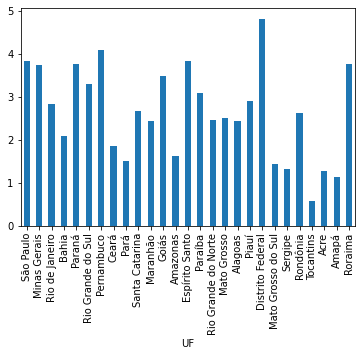

In [328]:
#vamos plotar o gráfico sem ordenar pois o mesmo está ordenado pelo maior gasto, então podemos ver que o o estrado que mais gasta, que é São Paulo, tem um custo por habitante próximo do estado que menos gasta, que é roraima
gastos_e_populacao_recentes["gasto por habitante 2021/Mar"].plot(kind="bar")

### Desafio 01: Ordenar por gasto por habitante, e ordenar por habitantes

<AxesSubplot:title={'center':'Os gastos por habitantes do mês de Março de 2021'}, xlabel='UF'>

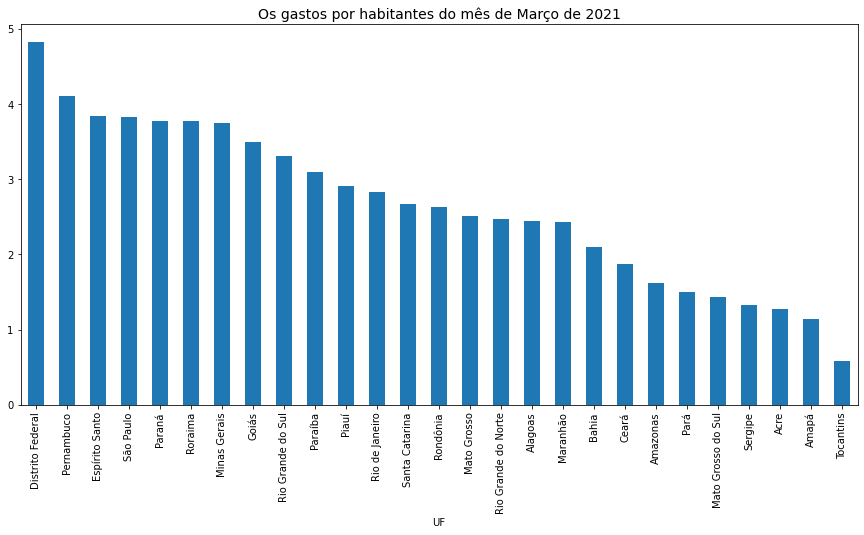

In [329]:
#ordenar por gasto por habitante
plt.figure(figsize=(15,7))
plt.title("Os gastos por habitantes do mês de Março de 2021", size=14)
gastos_e_populacao_recentes["gasto por habitante 2021/Mar"].sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:title={'center':'Os gastos do mês de Março por número de habitantes'}, xlabel='UF'>

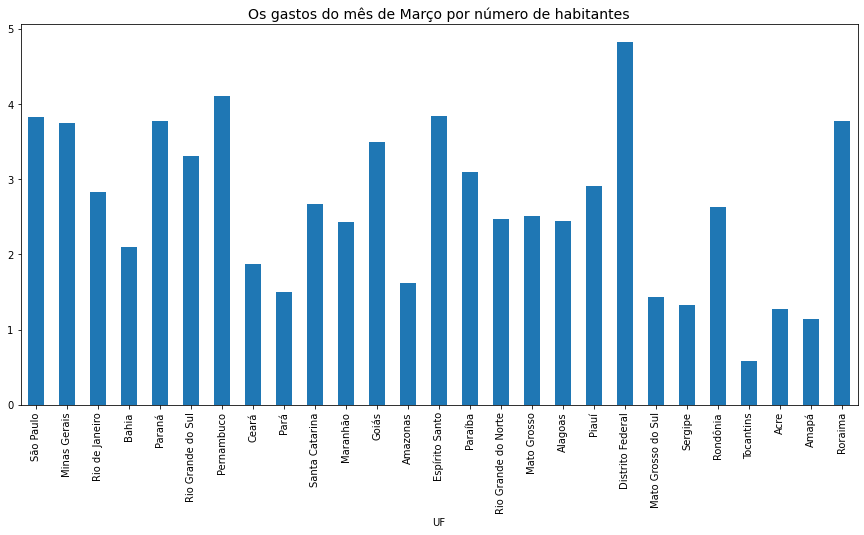

In [330]:
#ordenar por habitante
plt.figure(figsize=(15,7))
plt.title("Os gastos do mês de Março por número de habitantes", size=14)
gastos_e_populacao_recentes.sort_values(by="Populacao", ascending=False)["gasto por habitante 2021/Mar"].plot(kind="bar")

<AxesSubplot:xlabel='Populacao', ylabel='gastos 2021/Mar'>

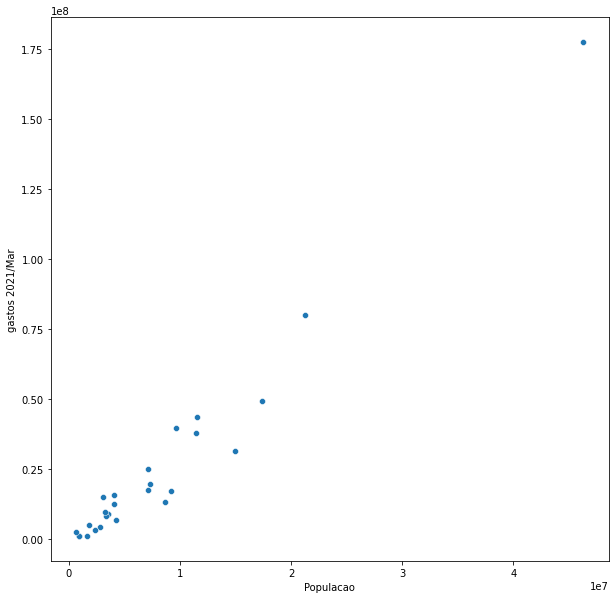

In [331]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=gastos_e_populacao_recentes, x="Populacao", y="gastos 2021/Mar")

<AxesSubplot:xlabel='Populacao', ylabel='gastos 2021/Mar'>

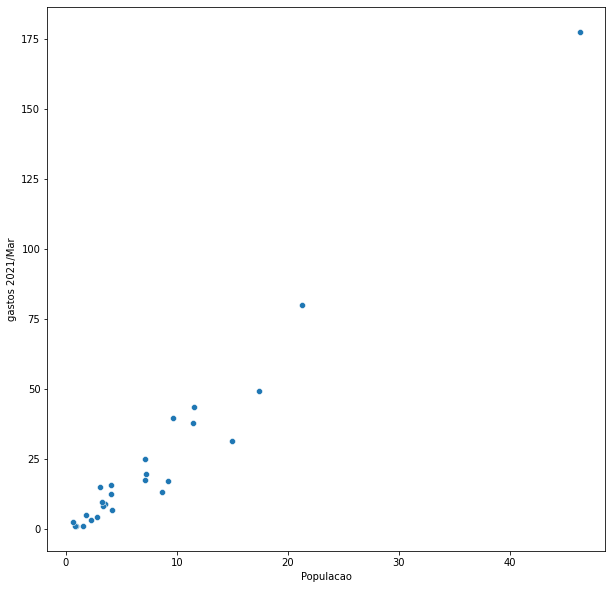

In [332]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=gastos_e_populacao_recentes / 1000000, x="Populacao", y="gastos 2021/Mar")

<AxesSubplot:xlabel='Populacao', ylabel='gasto por habitante 2021/Mar'>

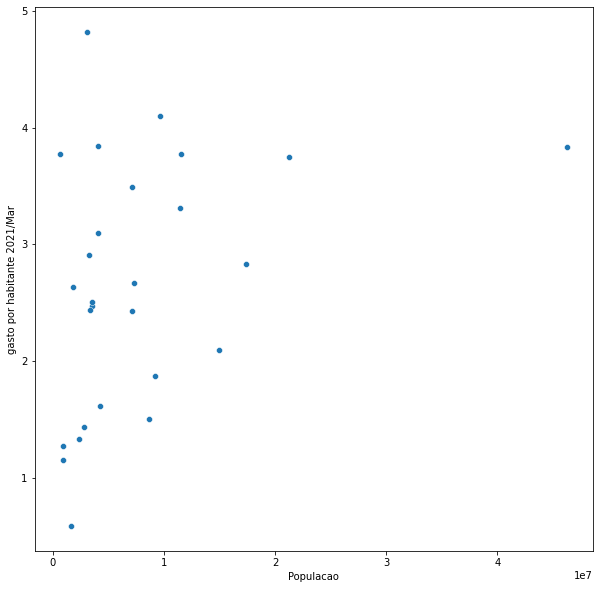

In [333]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=gastos_e_populacao_recentes, x="Populacao", y="gasto por habitante 2021/Mar")

### Super Desafio 02: Fazer os últimos gráficos para o mês anterior e comparar

In [334]:
#tabela original
meses_filtrados

2020/Mai  2020/Jun  2020/Jul  2020/Ago  2020/Set  \
Unidade da Federação                                                       
35 São Paulo              314.28    328.29    361.99    350.27    338.87   
31 Minas Gerais           142.75    157.28    177.47    182.18    181.42   
41 Paraná                 111.01    115.20    123.86    125.09    121.77   
43 Rio Grande do Sul       87.78     96.80    108.54    111.76    110.11   
33 Rio de Janeiro          89.73     88.14     95.94     89.80     81.89   
29 Bahia                   66.38     78.68     91.01     86.23     78.14   
26 Pernambuco              66.39     71.19     73.73     76.09     73.96   
42 Santa Catarina          58.10     63.11     79.46     75.06     67.84   
23 Ceará                   59.15     57.23     58.45     55.12     53.83   
52 Goiás                   35.10     38.89     45.87     47.57     47.95   
15 Pará                    43.33     40.99     40.50     38.79     36.97   
21 Maranhão                34.84     35.89     33.99     32.71     31.99   
32 Espírito Santo          29.29     31.96     41.93     36.41     34.49   
24 Rio Grande do Norte     20.43     23.03     28.61     25.72     25.10   
25 Paraíba                 19.62     22.67     22.09     19.35     17.71   
53 Distrito Federal        21.66     25.05     26.43     23.88     21.77   
50 Mato Grosso do Sul      17.50     19.72     23.64     22.61     21.52   
22 Piauí                   15.64     18.77     25.82     22.45     20.64   
27 Alagoas                 17.25     18.40     18.52     16.71     17.20   
51 Mato Grosso             14.68     18.55     20.68     20.94     20.18   
13 Amazonas                19.63     18.43     19.30     18.69     18.63   
28 Sergipe                  9.42     10.46     11.70     12.43     11.49   
17 Tocantins                7.39      7.87      7.93      6.49      4.23   
11 Rondônia                 8.96     10.99     10.48     11.43      8.88   
12 Acre                     2.94      3.91      4.05      3.66      3.47   
14 Roraima                  2.92      3.30      3.19      3.26      2.98   
16 Amapá                    2.76      2.74      2.54      2.70      2.53   

                        2020/Out  2020/Nov  2020/Dez  2021/Jan  2021/Fev  \
Unidade da Federação                                                       
35 São Paulo              328.06    324.60    326.85    324.12    268.19   
31 Minas Gerais           174.59    168.56    166.38    155.06    119.88   
41 Paraná                 127.51    133.44    122.15    106.95     83.13   
43 Rio Grande do Sul      113.89    116.74    116.83    102.32     84.40   
33 Rio de Janeiro          80.57     82.81     90.57     87.20     60.87   
29 Bahia                   82.91     81.87     83.13     70.33     55.54   
26 Pernambuco              72.36     71.81     77.88     76.81     62.26   
42 Santa Catarina          70.99     79.45     72.72     57.28     47.43   
23 Ceará                   54.68     54.03     50.27     43.74     30.19   
52 Goiás                   45.30     39.79     37.61     35.66     32.25   
15 Pará                    38.41     37.04     36.91     33.89     23.34   
21 Maranhão                34.43     32.45     30.93     26.80     23.26   
32 Espírito Santo          34.80     35.71     40.50     33.77     25.67   
24 Rio Grande do Norte     25.26     24.31     27.28     23.23     18.19   
25 Paraíba                 17.43     17.80     20.36     20.15     17.00   
53 Distrito Federal        23.09     20.67     22.55     22.57     19.00   
50 Mato Grosso do Sul      21.83     21.42     21.39     16.03     11.43   
22 Piauí                   20.33     20.02     19.35     18.44     13.64   
27 Alagoas                 18.11     18.86     17.46     16.50     12.79   
51 Mato Grosso             20.39     18.32     18.85     15.89     13.21   
13 Amazonas                18.73     20.45     21.55     24.44     13.68   
28 Sergipe                 12.57     11.82     11.00      7.15      4.1

In [335]:
#gerar tabela com mês anterior, que é 2021/Fev
gastos_penultimo_mes = meses_filtrados["2021/Fev"]
gastos_penultimo_mes

Unidade da Federação
35 São Paulo             268.19
31 Minas Gerais          119.88
41 Paraná                 83.13
43 Rio Grande do Sul      84.40
33 Rio de Janeiro         60.87
29 Bahia                  55.54
26 Pernambuco             62.26
42 Santa Catarina         47.43
23 Ceará                  30.19
52 Goiás                  32.25
15 Pará                   23.34
21 Maranhão               23.26
32 Espírito Santo         25.67
24 Rio Grande do Norte    18.19
25 Paraíba                17.00
53 Distrito Federal       19.00
50 Mato Grosso do Sul     11.43
22 Piauí                  13.64
27 Alagoas                12.79
51 Mato Grosso            13.21
13 Amazonas               13.68
28 Sergipe                 4.13
17 Tocantins               0.42
11 Rondônia                6.04
12 Acre                    2.27
14 Roraima                 3.04
16 Amapá                   1.53
Name: 2021/Fev, dtype: float64

In [336]:
#vamos chamar a função pra limpar as tabelas e unir
dados_da_populacao_penultimo_mes = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
dados_da_populacao_penultimo_mes = dados_da_populacao_penultimo_mes[0]
unida_penultimo_mes = limpeza_tabelas(dados_da_populacao_penultimo_mes, gastos_penultimo_mes)
#vamos chamar a função 
unida_penultimo_mes = gastos_e_gasto_por_habitante(unida_penultimo_mes, "2021/Fev")
#unida_penultimo_mes["gastos"] = unida_penultimo_mes["2021/Fev"] * 1000000
#unida_penultimo_mes["gasto por habitante"] = unida_penultimo_mes["gastos"]/ unida_penultimo_mes["Populacao"]
unida_penultimo_mes

Populacao  2021/Fev  gastos 2021/Fev  \
UF                                                          
São Paulo             46289333    268.19   268,193,064.06   
Minas Gerais          21292666    119.88   119,877,417.15   
Rio de Janeiro        17366189     60.87    60,873,103.08   
Bahia                 14930634     55.54    55,544,579.04   
Paraná                11516840     83.13    83,130,175.37   
Rio Grande do Sul     11422973     84.40    84,404,640.00   
Pernambuco             9616621     62.26    62,259,409.32   
Ceará                  9187103     30.19    30,186,951.00   
Pará                   8690745     23.34    23,343,222.94   
Santa Catarina         7252502     47.43    47,429,335.91   
Maranhão               7114598     23.26    23,260,245.95   
Goiás                  7113540     32.25    32,253,788.65   
Amazonas               4207714     13.68    13,679,358.06   
Espírito Santo         4064052     25.67    25,669,612.63   
Paraíba                4039277     17.00    16,996,494.03   
Rio Grande do Norte    3534165     18.19    18,186,942.80   
Mato Grosso            3526220     13.21    13,207,979.82   
Alagoas                3351543     12.79    12,792,571.64   
Piauí                  3281480     13.64    13,636,005.36   
Distrito Federal       3055149     19.00    19,004,029.87   
Mato Grosso do Sul     2809394     11.43    11,428,462.42   
Sergipe                2318822      4.13     4,129,845.36   
Rondônia               1796460      6.04     6,039,419.59   
Tocantins              1590248      0.42       416,534.32   
Acre                    894470      2.27     2,272,733.90   
Amapá                   861773      1.53     1,534,733.18   
Roraima                 631181      3.04     3,044,798.77   

                     gasto por habitante 2021/Fev  
UF                                                 
São Paulo                                    5.79  
Minas Gerais                                 5.63  
Rio de Janeiro                               3.51  
Bahia                                        3.72  
Paraná                                       7.22  
Rio Grande do Sul                            7.39  
Pernambuco                                   6.47  
Ceará                                        3.29  
Pará                                         2.69  
Santa Catarina                               6.54  
Maranhão                                     3.27  
Goiás                                        4.53  
Amazonas                                     3.25  
Espírito Santo                               6.32  
Paraíba                                      4.21  
Rio Grande do Norte                          5.15  
Mato Grosso                                  3.75  
Alagoas                                      3.82  
Piauí                                        4.16  
Distrito Federal                             6.22  
Mato Grosso do Sul                           4.07  
Sergipe                                      1.78  
Rondônia                                     3.36  
Tocantins                                    0.26  
Acre                                         2.54  
Amapá                                        1.78  
Roraima                                      4.82

In [337]:
unida_penultimo_mes.shape

(27, 4)

<AxesSubplot:title={'center':'População e Gastos'}, xlabel='Populacao', ylabel='gastos 2021/Fev'>

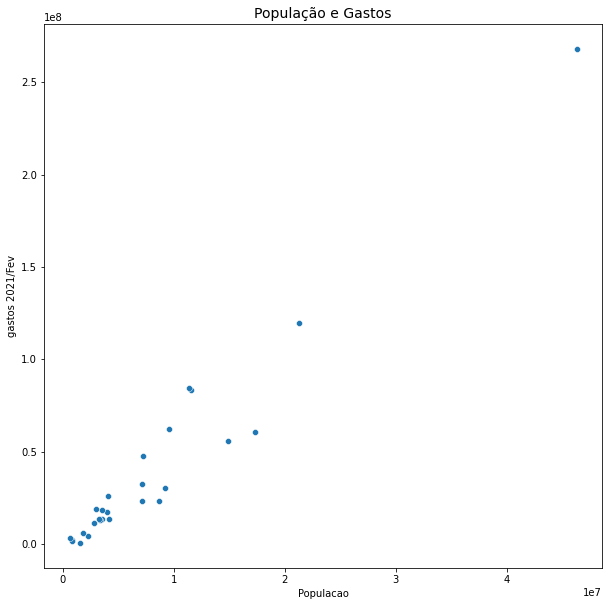

In [338]:
#vamos plotar os gráficos com a nova tabela
plt.figure(figsize=(10,10))
plt.title("População e Gastos", size=14)
sns.scatterplot(data=unida_penultimo_mes, x="Populacao", y="gastos 2021/Fev")

<AxesSubplot:title={'center':'População e Gastos por milhão'}, xlabel='Populacao', ylabel='gastos 2021/Fev'>

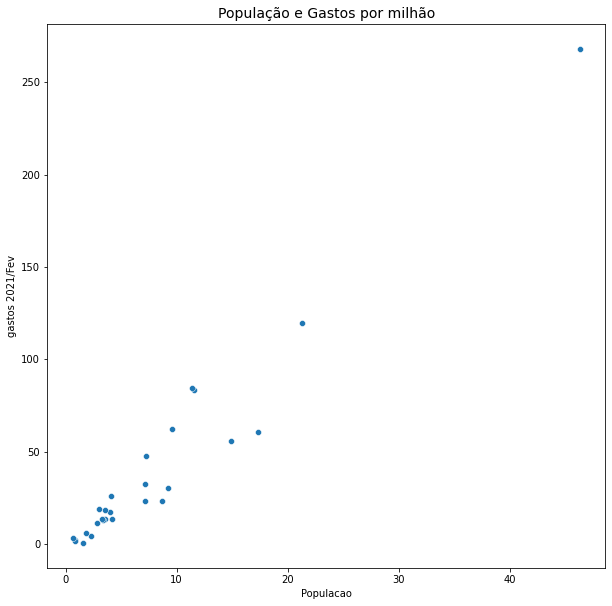

In [339]:
plt.figure(figsize=(10,10))
plt.title("População e Gastos por milhão", size=14)
sns.scatterplot(data=unida_penultimo_mes / 1000000, x="Populacao", y="gastos 2021/Fev")

<AxesSubplot:title={'center':'População e Gasto por Habitante'}, xlabel='Populacao', ylabel='gasto por habitante 2021/Fev'>

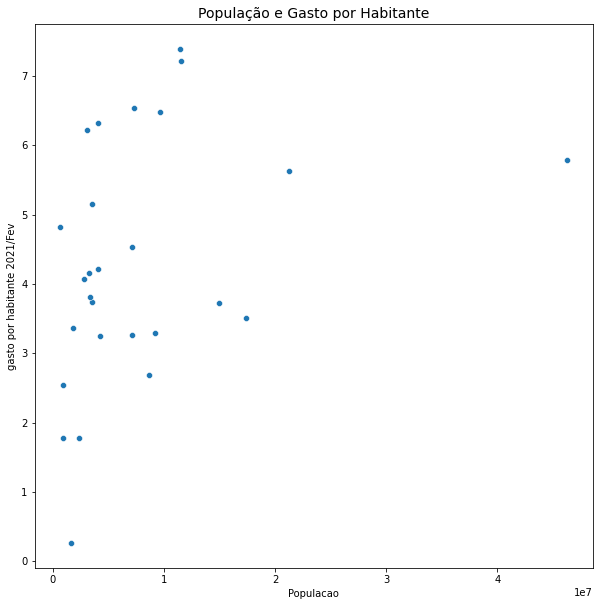

In [340]:
plt.figure(figsize=(10,10))
plt.title("População e Gasto por Habitante", size=14)
sns.scatterplot(data=unida_penultimo_mes, x="Populacao", y="gasto por habitante 2021/Fev")

###  Desafio 03: Fazer os últimos gráficos com os dois meses e diferenciar por cor

In [341]:
#criar uma tabela com o último e o penúltimo mês
unida_penultimo_e_ultimo_mes = unida_penultimo_mes
unida_penultimo_e_ultimo_mes["gastos 2021/Mar"] = gastos_e_populacao_recentes["gastos 2021/Mar"]
unida_penultimo_e_ultimo_mes["gasto por habitante 2021/Mar"] = gastos_e_populacao_recentes["gasto por habitante 2021/Mar"]
unida_penultimo_e_ultimo_mes

Populacao  2021/Fev  gastos 2021/Fev  \
UF                                                          
São Paulo             46289333    268.19   268,193,064.06   
Minas Gerais          21292666    119.88   119,877,417.15   
Rio de Janeiro        17366189     60.87    60,873,103.08   
Bahia                 14930634     55.54    55,544,579.04   
Paraná                11516840     83.13    83,130,175.37   
Rio Grande do Sul     11422973     84.40    84,404,640.00   
Pernambuco             9616621     62.26    62,259,409.32   
Ceará                  9187103     30.19    30,186,951.00   
Pará                   8690745     23.34    23,343,222.94   
Santa Catarina         7252502     47.43    47,429,335.91   
Maranhão               7114598     23.26    23,260,245.95   
Goiás                  7113540     32.25    32,253,788.65   
Amazonas               4207714     13.68    13,679,358.06   
Espírito Santo         4064052     25.67    25,669,612.63   
Paraíba                4039277     17.00    16,996,494.03   
Rio Grande do Norte    3534165     18.19    18,186,942.80   
Mato Grosso            3526220     13.21    13,207,979.82   
Alagoas                3351543     12.79    12,792,571.64   
Piauí                  3281480     13.64    13,636,005.36   
Distrito Federal       3055149     19.00    19,004,029.87   
Mato Grosso do Sul     2809394     11.43    11,428,462.42   
Sergipe                2318822      4.13     4,129,845.36   
Rondônia               1796460      6.04     6,039,419.59   
Tocantins              1590248      0.42       416,534.32   
Acre                    894470      2.27     2,272,733.90   
Amapá                   861773      1.53     1,534,733.18   
Roraima                 631181      3.04     3,044,798.77   

                     gasto por habitante 2021/Fev  gastos 2021/Mar  \
UF                                                                   
São Paulo                                    5.79   177,408,317.71   
Minas Gerais                                 5.63    79,780,838.00   
Rio de Janeiro                               3.51    49,149,884.48   
Bahia                                        3.72    31,314,602.44   
Paraná                                       7.22    43,480,729.07   
Rio Grande do Sul                            7.39    37,798,832.80   
Pernambuco                                   6.47    39,472,738.81   
Ceará                                        3.29    17,173,151.55   
Pará                                         2.69    13,069,564.31   
Santa Catarina                               6.54    19,375,822.56   
Maranhão                                     3.27    17,294,509.11   
Goiás                                        4.53    24,867,001.02   
Amazonas                                     3.25     6,799,060.80   
Espírito Santo                               6.32    15,606,368.11   
Paraíba                                      4.21    12,517,894.05   
Rio Grande do Norte                          5.15     8,733,455.36   
Mato Grosso                                  3.75     8,835,890.09   
Alagoas                                      3.82     8,180,887.21   
Piauí                                        4.16     9,542,151.53   
Distrito Federal                             6.22    14,731,938.43   
Mato Grosso do Sul                           4.07     4,035,989.77   
Sergipe                                      1.78     3,081,081.42   
Rondônia                                     3.36     4,732,441.04   
Tocantins                                    0.26       928,756.84   
Acre                                         2.54     1,137,341.65   
Amapá                                        1.78       989,155.40   
Roraima                                      4.82     2,381,844.31   

                     gasto por habitante 2021/Mar  
UF                                                 
São Paulo                                    3.83  
Minas Gerais                                 3.75  
Rio de Janei

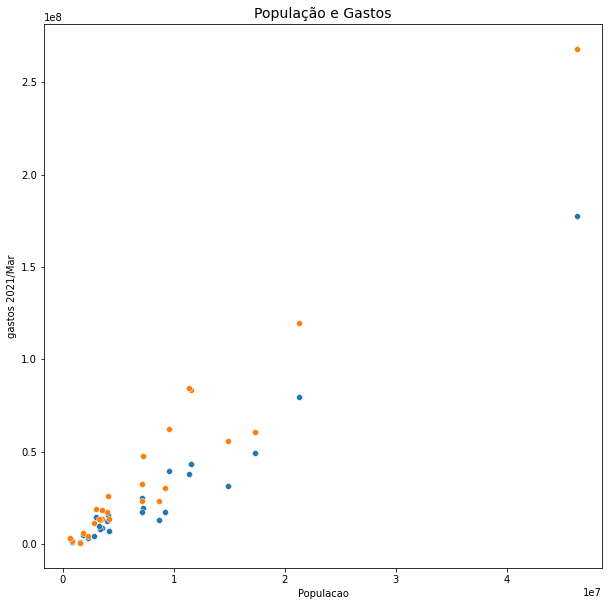

In [342]:
#como Seaborn basta você passar duas vezes o comando com dados diferentes que ele plota com cores diferentes
plt.figure(figsize=(10,10))
plt.title("População e Gastos", size=14)
sns.scatterplot(data=unida_penultimo_e_ultimo_mes, x="Populacao", y="gastos 2021/Mar")
sns.scatterplot(data=unida_penultimo_e_ultimo_mes, x="Populacao", y="gastos 2021/Fev")
plt.show()

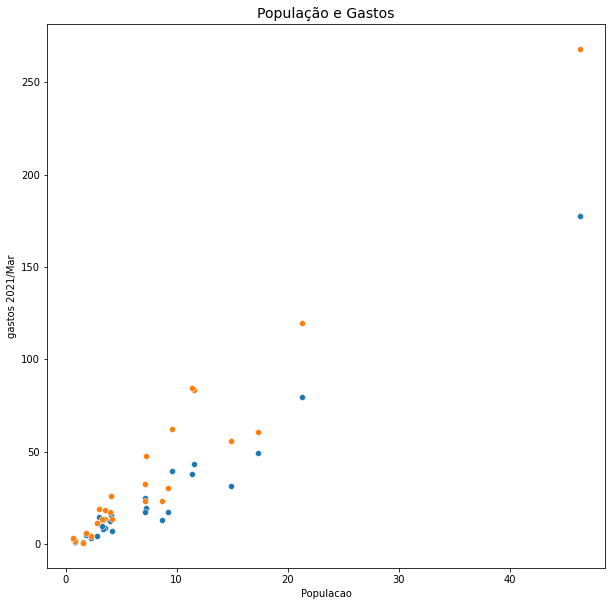

In [343]:
plt.figure(figsize=(10,10))
plt.title("População e Gastos", size=14)
sns.scatterplot(data=unida_penultimo_e_ultimo_mes / 1000000, x="Populacao", y="gastos 2021/Mar")
sns.scatterplot(data=unida_penultimo_e_ultimo_mes / 1000000, x="Populacao", y="gastos 2021/Fev")
plt.show()

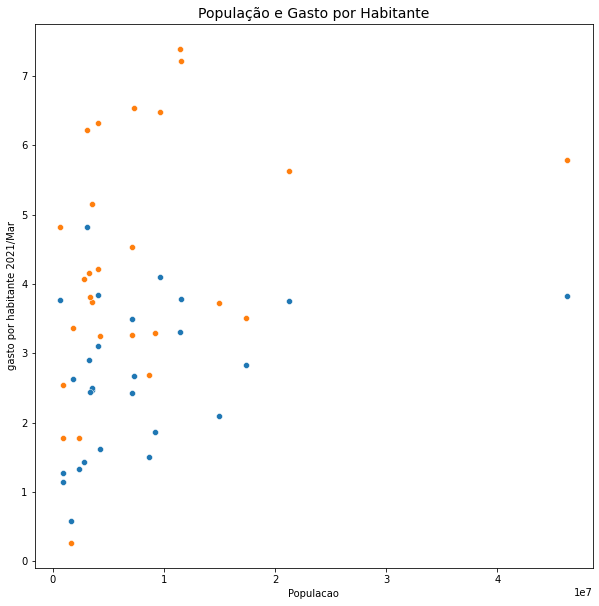

In [344]:
plt.figure(figsize=(10,10))
plt.title("População e Gasto por Habitante", size=14)
sns.scatterplot(data=unida_penultimo_e_ultimo_mes, x="Populacao", y="gasto por habitante 2021/Mar")
sns.scatterplot(data=unida_penultimo_e_ultimo_mes, x="Populacao", y="gasto por habitante 2021/Fev")
plt.show()

### Aula 06 - Formatação de ticks e escalas

In [345]:
#criar um dataframe sem a coluna Total e sem algumas colunas iniciais e finais para que esses valores não atrapalhe os gráficos
ordenado_por_total_sem_total = ordenado_por_total.loc[:,"2008/Fev" : "2021/Fev"]
ordenado_por_total_sem_total.head()

2008/Fev  2008/Mar  2008/Abr  2008/Mai  2008/Jun  \
Unidade da Federação                                                     
35 São Paulo            172.96    170.56    170.34    172.46    175.49   
31 Minas Gerais          70.30     79.12     79.05     79.27     79.62   
41 Paraná                48.86     55.61     56.12     55.57     56.09   
43 Rio Grande do Sul     45.90     52.93     51.97     51.68     53.76   
33 Rio de Janeiro        44.13     42.90     45.31     43.95     44.11   

                      2008/Jul  2008/Ago  2008/Set  2008/Out  2008/Nov  ...  \
Unidade da Federação                                                    ...   
35 São Paulo            179.57    180.01    180.15    191.86    190.93  ...   
31 Minas Gerais          82.21     80.37     82.41     88.61     84.49  ...   
41 Paraná                59.80     56.70     58.09     61.37     59.67  ...   
43 Rio Grande do Sul     56.39     56.23     57.91     59.59     57.57  ...   
33 Rio de Janeiro        44.36     42.50     43.07     44.55     41.35  ...   

                      2020/Mai  2020/Jun  2020/Jul  2020/Ago  2020/Set  \
Unidade da Federação                                                     
35 São Paulo            314.28    328.29    361.99    350.27    338.87   
31 Minas Gerais         142.75    157.28    177.47    182.18    181.42   
41 Paraná               111.01    115.20    123.86    125.09    121.77   
43 Rio Grande do Sul     87.78     96.80    108.54    111.76    110.11   
33 Rio de Janeiro        89.73     88.14     95.94     89.80     81.89   

                      2020/Out  2020/Nov  2020/Dez  2021/Jan  2021/Fev  
Unidade da Federação                                                    
35 São Paulo            328.06    324.60    326.85    324.12    268.19  
31 Minas Gerais         174.59    168.56    166.38    155.06    119.88  
41 Paraná               127.51    133.44    122.15    106.95     83.13  
43 Rio Grande do Sul    113.89    116.74    116.83    102.32     84.40  
33 Rio de Janeiro        80.57     82.81     90.57     87.20     60.87  

[5 rows x 157 columns]

<AxesSubplot:ylabel='35 São Paulo'>

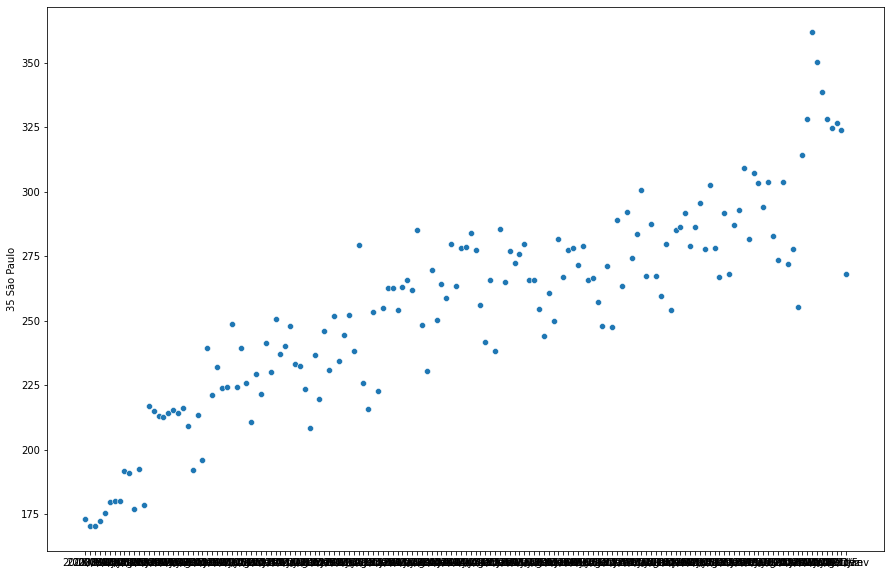

In [346]:
#plotando com op Seaborn sem passar um Dataframe, passando apenas listas nos eixos
plt.figure(figsize=(15,10))
sns.scatterplot(x=ordenado_por_total_sem_total.columns, y=ordenado_por_total_sem_total.loc["35 São Paulo"])

In [347]:
#utilizando o Transpose, que alterna as linhas e colunas do Dataframe
#agora os meses são os índices
ordenado_por_total_sem_total.T.head()

Unidade da Federação  35 São Paulo  31 Minas Gerais  41 Paraná  \
2008/Fev                    172.96            70.30      48.86   
2008/Mar                    170.56            79.12      55.61   
2008/Abr                    170.34            79.05      56.12   
2008/Mai                    172.46            79.27      55.57   
2008/Jun                    175.49            79.62      56.09   

Unidade da Federação  43 Rio Grande do Sul  33 Rio de Janeiro  29 Bahia  \
2008/Fev                             45.90              44.13     33.41   
2008/Mar                             52.93              42.90     41.32   
2008/Abr                             51.97              45.31     42.83   
2008/Mai                             51.68              43.95     42.09   
2008/Jun                             53.76              44.11     39.91   

Unidade da Federação  26 Pernambuco  42 Santa Catarina  23 Ceará  52 Goiás  \
2008/Fev                      26.22              24.41     27.64     18.15   
2008/Mar                      30.72              27.48     30.09     20.99   
2008/Abr                      30.59              27.81     31.38     21.05   
2008/Mai                      31.42              28.35     31.19     19.16   
2008/Jun                      28.95              28.99     29.46     20.36   

Unidade da Federação  ...  22 Piauí  27 Alagoas  51 Mato Grosso  13 Amazonas  \
2008/Fev              ...      9.71        8.11            7.93         7.93   
2008/Mar              ...     10.43        9.21            9.42         8.64   
2008/Abr              ...     10.23       10.47            9.39         8.53   
2008/Mai              ...     10.56        9.84            9.38         9.08   
2008/Jun              ...     10.47       10.30            9.45         8.65   

Unidade da Federação  28 Sergipe  17 Tocantins  11 Rondônia  12 Acre  \
2008/Fev                    4.64          5.05         1.94     1.74   
2008/Mar                    5.02          5.20         1.96     2.06   
2008/Abr                    5.27          5.34         2.14     2.06   
2008/Mai                    5.37          5.34         2.28     2.23   
2008/Jun                    4.98          5.40         2.62     2.11   

Unidade da Federação  14 Roraima  16 Amapá  
2008/Fev                    0.77      1.28  
2008/Mar                    0.88      1.18  
2008/Abr                    0.90      1.40  
2008/Mai                    1.03      1.41  
2008/Jun                    0.94      1.42  

[5 rows x 27 columns]

<AxesSubplot:ylabel='35 São Paulo'>

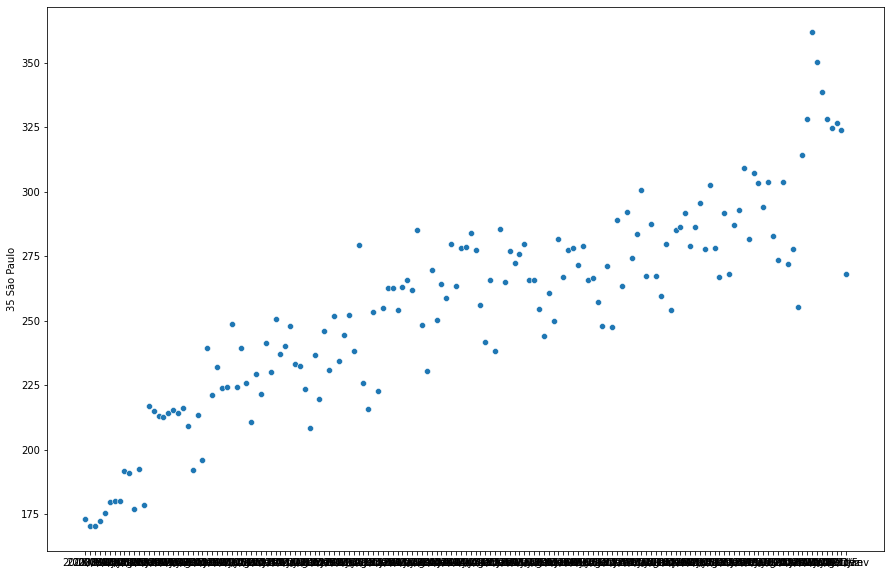

In [348]:
#utilizando o Transpose, que alterna as linhas e colunas do Dataframe
plt.figure(figsize=(15,10))
sns.scatterplot(data=ordenado_por_total_sem_total.T, x=ordenado_por_total_sem_total.T.index, y="35 São Paulo")

<AxesSubplot:ylabel='35 São Paulo'>

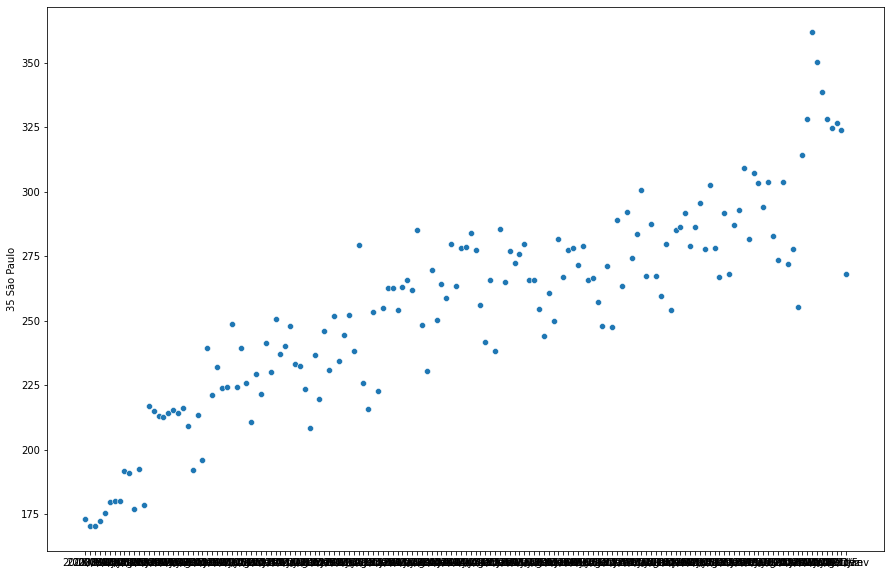

In [349]:
#criando um Dataframe com o Transpose
mensal = ordenado_por_total_sem_total.T
plt.figure(figsize=(15,10))
sns.scatterplot(data=mensal, x=mensal.index, y="35 São Paulo")

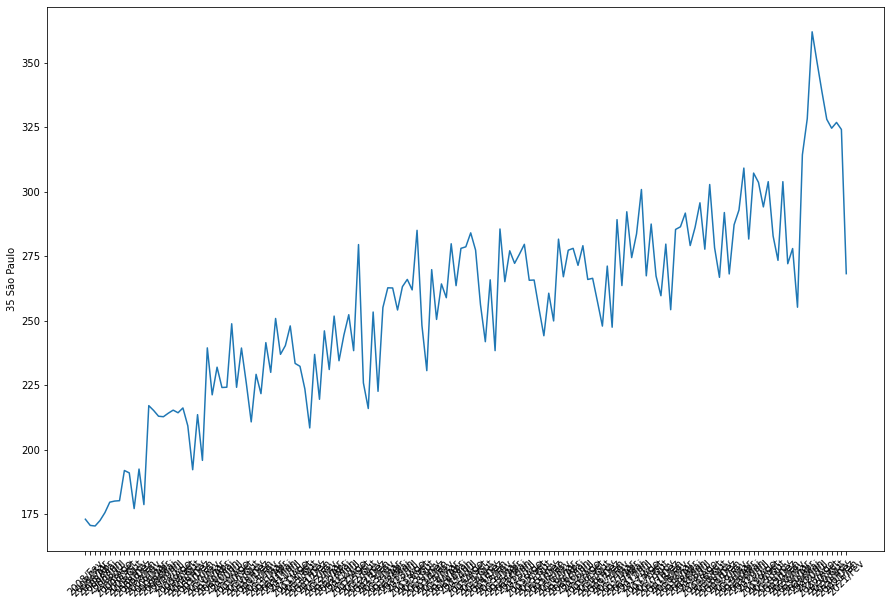

In [350]:
#plotar usando gráfico de linhas e trabalhar as informações adicionais como ticks e títulos
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.lineplot(data=mensal, x=mensal.index, y="35 São Paulo")
plt.show()

### Desafio 01: Plotar as informações do seu estado (Rio Grande do Sul)

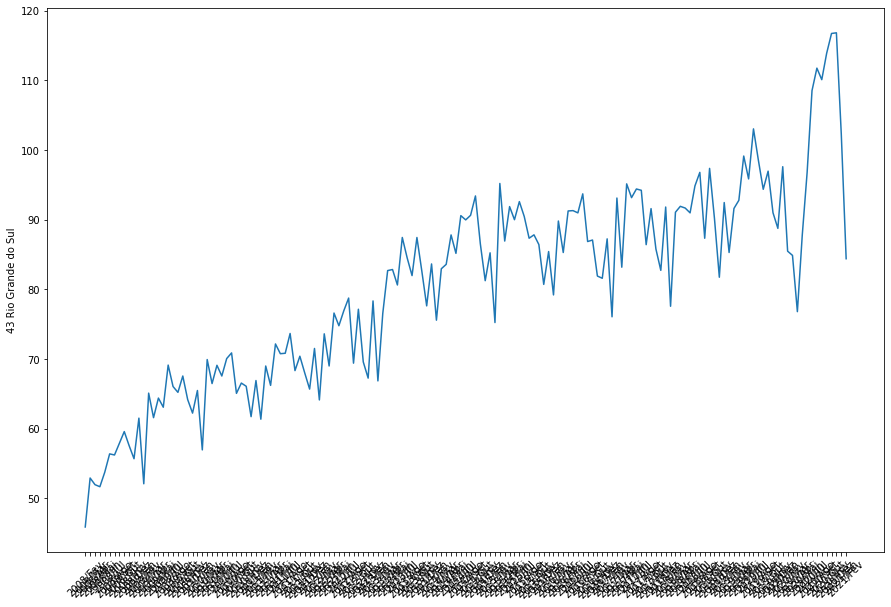

In [351]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.lineplot(data=mensal, x=mensal.index, y="43 Rio Grande do Sul")
plt.show()

### Desafio 02: Formatar o eixo y com StrMethodFormatter (milhões), colocar um título e colocar o título dos 2 eixos

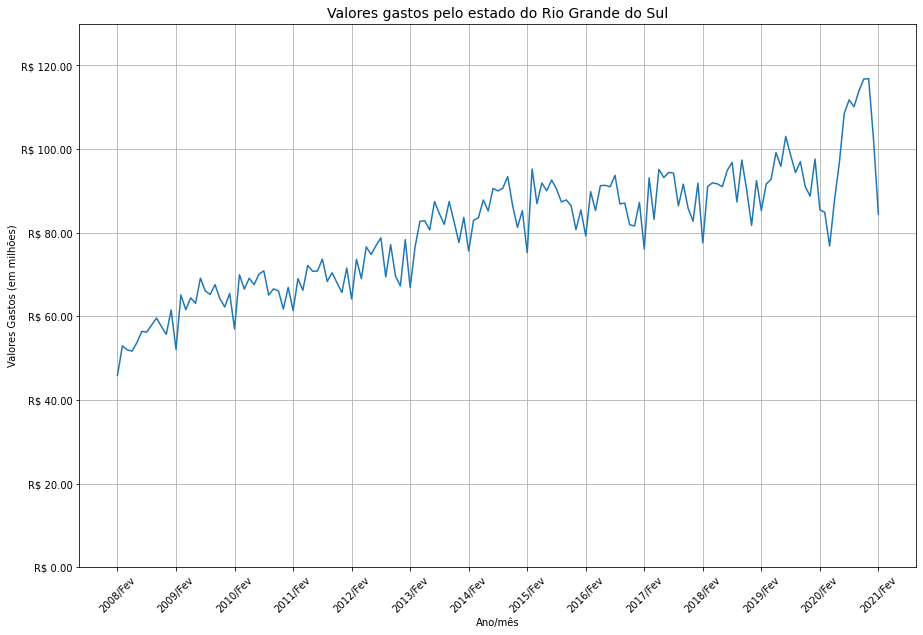

In [352]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.title("Valores gastos pelo estado do Rio Grande do Sul", size=14)
plt.xlabel("Ano/mês")
plt.ylabel("Valores Gastos (em milhões)")
plt.ylim(0, 130)
plt.grid(True)
ax = sns.lineplot(data=mensal, x=mensal.index, y="43 Rio Grande do Sul")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.show()

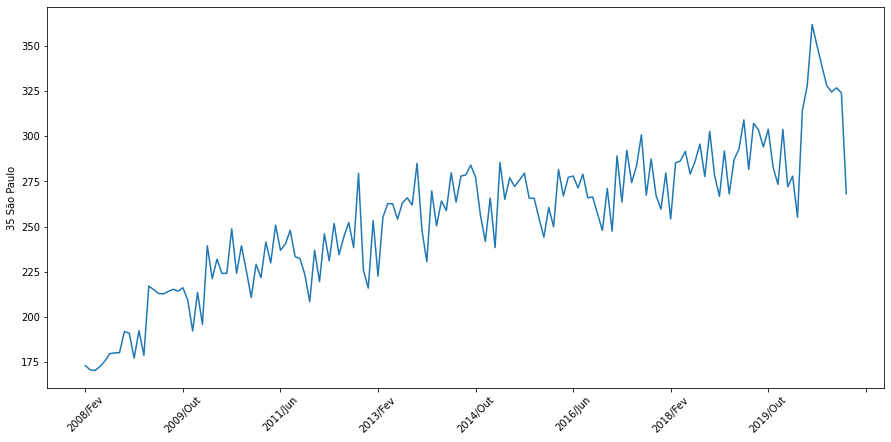

In [353]:
#plotar usando gráfico de linhas e trabalhar as informações adicionais como ticks e títulos
plt.figure(figsize=(15,7))
ax = sns.lineplot(data=mensal, x=mensal.index, y="35 São Paulo")
plt.xticks(rotation=45)
#configurar o intervalo dos ticks do eixo x
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

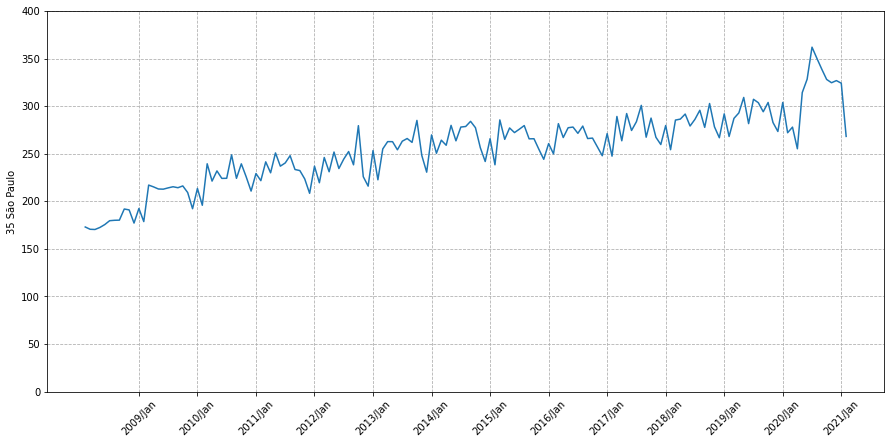

In [354]:
#configurar o intervalo dos ticks do eixo x e grid
#documentação: https://matplotlib.org/stable/gallery/ticks_and_spines/tick-locators.html
plt.figure(figsize=(15,7))
ax = sns.lineplot(data=mensal, x=mensal.index, y="35 São Paulo")
plt.xticks(rotation=45)
#configura os limites do eixo y
plt.ylim(0, 400)
#começará no primeiro mês do Dataframe, que é 2008/Fev
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
#para começar em janeiro é necessário mudar o offset
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
#adiciona o grid no gráfico e muda o layout
plt.grid(True, linestyle="--")
plt.show()

### Aula: Datas com Datetime


In [355]:
#Atualmente as datas são strings, e é interessante transfrmá-las no tipo Data para poder trabalhar mais eficientemente
#documentação do datetime: https://docs.python.org/3/library/datetime.html
import datetime
#no nosso caso não estamos interessados na hora, então vamos importar apenas o date
from datetime import date

In [356]:
datetime.datetime(2020,11,3)

datetime.datetime(2020, 11, 3, 0, 0)

In [357]:
date.today()

datetime.date(2021, 6, 7)

In [358]:
#criação de um dicionário para mapeamento dos meses
meses={
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

In [359]:
def para_dia(ano_mes: str):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return date(ano, mes_numero, 1)

In [360]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação  35 São Paulo  31 Minas Gerais  41 Paraná  \
2008-02-01                  172.96            70.30      48.86   
2008-03-01                  170.56            79.12      55.61   
2008-04-01                  170.34            79.05      56.12   
2008-05-01                  172.46            79.27      55.57   
2008-06-01                  175.49            79.62      56.09   

Unidade da Federação  43 Rio Grande do Sul  33 Rio de Janeiro  29 Bahia  \
2008-02-01                           45.90              44.13     33.41   
2008-03-01                           52.93              42.90     41.32   
2008-04-01                           51.97              45.31     42.83   
2008-05-01                           51.68              43.95     42.09   
2008-06-01                           53.76              44.11     39.91   

Unidade da Federação  26 Pernambuco  42 Santa Catarina  23 Ceará  52 Goiás  \
2008-02-01                    26.22              24.41     27.64     18.15   
2008-03-01                    30.72              27.48     30.09     20.99   
2008-04-01                    30.59              27.81     31.38     21.05   
2008-05-01                    31.42              28.35     31.19     19.16   
2008-06-01                    28.95              28.99     29.46     20.36   

Unidade da Federação  ...  22 Piauí  27 Alagoas  51 Mato Grosso  13 Amazonas  \
2008-02-01            ...      9.71        8.11            7.93         7.93   
2008-03-01            ...     10.43        9.21            9.42         8.64   
2008-04-01            ...     10.23       10.47            9.39         8.53   
2008-05-01            ...     10.56        9.84            9.38         9.08   
2008-06-01            ...     10.47       10.30            9.45         8.65   

Unidade da Federação  28 Sergipe  17 Tocantins  11 Rondônia  12 Acre  \
2008-02-01                  4.64          5.05         1.94     1.74   
2008-03-01                  5.02          5.20         1.96     2.06   
2008-04-01                  5.27          5.34         2.14     2.06   
2008-05-01                  5.37          5.34         2.28     2.23   
2008-06-01                  4.98          5.40         2.62     2.11   

Unidade da Federação  14 Roraima  16 Amapá  
2008-02-01                  0.77      1.28  
2008-03-01                  0.88      1.18  
2008-04-01                  0.90      1.40  
2008-05-01                  1.03      1.41  
2008-06-01                  0.94      1.42  

[5 rows x 27 columns]

In [362]:
#tipagem do índice é Data: Index: 2008-02-01 to 2021-02-01
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 2008-02-01 to 2021-02-01
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   35 São Paulo            157 non-null    float64
 1   31 Minas Gerais         157 non-null    float64
 2   41 Paraná               157 non-null    float64
 3   43 Rio Grande do Sul    157 non-null    float64
 4   33 Rio de Janeiro       157 non-null    float64
 5   29 Bahia                157 non-null    float64
 6   26 Pernambuco           157 non-null    float64
 7   42 Santa Catarina       157 non-null    float64
 8   23 Ceará                157 non-null    float64
 9   52 Goiás                157 non-null    float64
 10  15 Pará                 157 non-null    float64
 11  21 Maranhão             157 non-null    float64
 12  32 Espírito Santo       157 non-null    float64
 13  24 Rio Grande do Norte  157 non-null    float64
 14  25 Paraíba              157 non

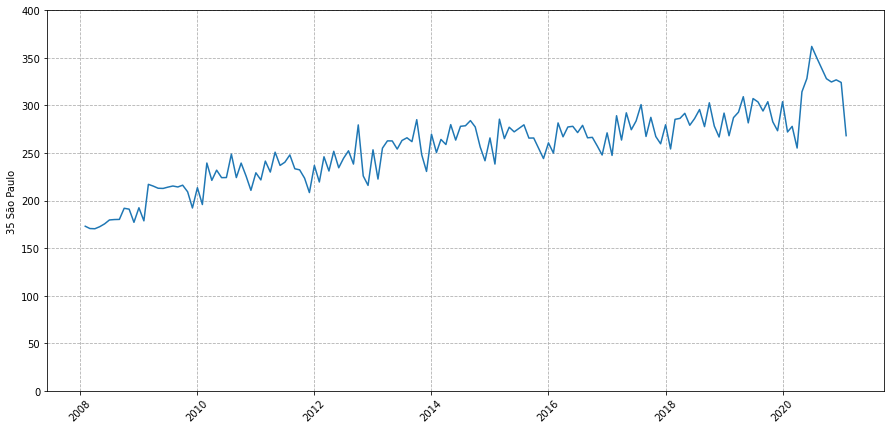

In [361]:
#como o índice é um campo Data, os ticks do gráfico automaticamente se ajustam
plt.figure(figsize=(15,7))
ax = sns.lineplot(data=mensal, x=mensal.index, y="35 São Paulo")
plt.xticks(rotation=45)
#configura os limites do eixo y
plt.ylim(0, 400)
#começará no primeiro mês do Dataframe, que é 2008/Fev
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
#para começar em janeiro é necessário mudar o offset
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
#adiciona o grid no gráfico e muda o layout
plt.grid(True, linestyle="--")
plt.show()

### Aula: Manipulação de dados com o Melt

In [363]:
mensal.head()

Unidade da Federação  35 São Paulo  31 Minas Gerais  41 Paraná  \
2008-02-01                  172.96            70.30      48.86   
2008-03-01                  170.56            79.12      55.61   
2008-04-01                  170.34            79.05      56.12   
2008-05-01                  172.46            79.27      55.57   
2008-06-01                  175.49            79.62      56.09   

Unidade da Federação  43 Rio Grande do Sul  33 Rio de Janeiro  29 Bahia  \
2008-02-01                           45.90              44.13     33.41   
2008-03-01                           52.93              42.90     41.32   
2008-04-01                           51.97              45.31     42.83   
2008-05-01                           51.68              43.95     42.09   
2008-06-01                           53.76              44.11     39.91   

Unidade da Federação  26 Pernambuco  42 Santa Catarina  23 Ceará  52 Goiás  \
2008-02-01                    26.22              24.41     27.64     18.15   
2008-03-01                    30.72              27.48     30.09     20.99   
2008-04-01                    30.59              27.81     31.38     21.05   
2008-05-01                    31.42              28.35     31.19     19.16   
2008-06-01                    28.95              28.99     29.46     20.36   

Unidade da Federação  ...  22 Piauí  27 Alagoas  51 Mato Grosso  13 Amazonas  \
2008-02-01            ...      9.71        8.11            7.93         7.93   
2008-03-01            ...     10.43        9.21            9.42         8.64   
2008-04-01            ...     10.23       10.47            9.39         8.53   
2008-05-01            ...     10.56        9.84            9.38         9.08   
2008-06-01            ...     10.47       10.30            9.45         8.65   

Unidade da Federação  28 Sergipe  17 Tocantins  11 Rondônia  12 Acre  \
2008-02-01                  4.64          5.05         1.94     1.74   
2008-03-01                  5.02          5.20         1.96     2.06   
2008-04-01                  5.27          5.34         2.14     2.06   
2008-05-01                  5.37          5.34         2.28     2.23   
2008-06-01                  4.98          5.40         2.62     2.11   

Unidade da Federação  14 Roraima  16 Amapá  
2008-02-01                  0.77      1.28  
2008-03-01                  0.88      1.18  
2008-04-01                  0.90      1.40  
2008-05-01                  1.03      1.41  
2008-06-01                  0.94      1.42  

[5 rows x 27 columns]

In [366]:
#Queremos plotar todos os estados

#Primeiro: tirar o índice (vai virar uma coluna index com os meses como valor da coluna), e dar um melt pra gerar uma coluna contendo os estados
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["mes", "uf", "gasto"]
mensal_aberto.head()


mes            uf  gasto
0  2008-02-01  35 São Paulo 172.96
1  2008-03-01  35 São Paulo 170.56
2  2008-04-01  35 São Paulo 170.34
3  2008-05-01  35 São Paulo 172.46
4  2008-06-01  35 São Paulo 175.49

### Desafio 01: voltar atrás, partindo do `mensal_aberto` e chegar no `mensal`

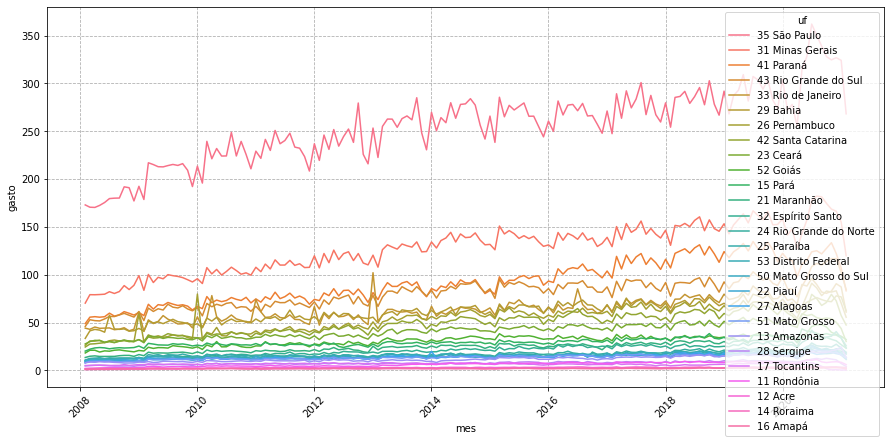

In [370]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
plt.xticks(rotation=45)
#configura os limites do eixo y
#plt.ylim(0, 400)
#começará no primeiro mês do Dataframe, que é 2008/Fev
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
#para começar em janeiro é necessário mudar o offset
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
#adiciona o grid no gráfico e muda o layout
plt.grid(True, linestyle="--")
plt.show()

### Desafio: escolher alguns estados que faça sentido comparar, mude a posição da l
egenda, o título dos eixos e a paleta de cores
ref: https://seaborn.pydata.org/tutorial/color_palettes.html

In [371]:
mensal_aberto.head()

mes            uf  gasto
0  2008-02-01  35 São Paulo 172.96
1  2008-03-01  35 São Paulo 170.56
2  2008-04-01  35 São Paulo 170.34
3  2008-05-01  35 São Paulo 172.46
4  2008-06-01  35 São Paulo 175.49